# Statistical tests

This notebook contains the code for generating the plots for the Bayesian test results. The actual bayesian tests are coded in the `Statistical_Tests.py` script. 

Heatmaps generated compare each method with all the others. 

In [437]:
import cv2
import baycomp as bc
import pandas as pd
import math

import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [438]:
"""
models = {
          'rfc': (('BASE', 'rfc'),
                  ('CoTraining', 'cot_rf'), 
                  #('DemocraticCoLearning', 'dcol_rf+gnb+svc'), 
                  ('TriTraining', 'trit_rf')), 
          'abc': (('BASE', 'abc'), 
                  ('CoTraining', 'cot_ab'),
                  #('DemocraticCoLearning', 'dcol_ab+gnb+svc'), 
                  ('TriTraining', 'trit_ab')), 
          'dtc': (('BASE', 'dtc'), 
                  ('CoTraining', 'cot_dt'), 
                  #('DemocraticCoLearning', 'dcol_dt+gnb+svc'), 
                  ('TriTraining', 'trit_dt')), 
          'svc': (('BASE', 'svc'), 
                  ('CoTraining', 'cot_svm'),
                  #('DemocraticCoLearning', 'dcol_rf+gnb+svc'), 
                  #('DemocraticCoLearning', 'dcol_ab+gnb+svc'), 
                  #('DemocraticCoLearning', 'dcol_dt+gnb+svc'), 
                  ('TriTraining', 'trit_svm')), 
          'gnb': (('BASE', 'gnb'), 
                  ('CoTraining', 'cot_gnb'),
                  #('DemocraticCoLearning', 'dcol_rf+gnb+svc'),
                  #('DemocraticCoLearning', 'dcol_ab+gnb+svc'),
                  #('DemocraticCoLearning', 'dcol_dt+gnb+svc'),
                  ('TriTraining', 'trit_gnb')), 
          'knnc': (('BASE', 'knnc'), 
                   ('CoTraining', 'cot_knn'),
                   ('TriTraining', 'trit_knn')), 
          'rfr': (('BASE', 'rfr'), 
                  ('TriTrainingRegressor', 'tritr_rf'), 
                 ),
          'abr': (('BASE', 'abr'), 
                  ('TriTrainingRegressor', 'tritr_ab'), 
                 ),
          'dtr': (('BASE', 'dtr'), 
                  ('TriTrainingRegressor', 'tritr_dt'), 
                 ),
          'r': (('BASE', 'r'), 
                ('TriTrainingRegressor', 'tritr_r'),
               ), 
          'svr': (('BASE', 'svr'), 
                  ('TriTrainingRegressor', 'tritr_svm'), 
                 ),
          'knnr': (('BASE', 'knnr'), 
                   ('TriTrainingRegressor', 'tritr_knn'),
                   ('CoRegression', 'cor'), 
                  )
          }
"""

models = {
          'rfr': (('BASE', 'rfr'), 
                  ('TriTrainingRegressor', 'tritr_rf'), 
                 ),
          'abr': (('BASE', 'abr'), 
                  ('TriTrainingRegressor', 'tritr_ab'), 
                 ),
          'dtr': (('BASE', 'dtr'), 
                  ('TriTrainingRegressor', 'tritr_dt'), 
                 ),
          'r': (('BASE', 'r'), 
                ('TriTrainingRegressor', 'tritr_r'),
               ), 
          'svr': (('BASE', 'svr'), 
                  ('TriTrainingRegressor', 'tritr_svm'), 
                 ),
          'knnr': (('BASE', 'knnr'), 
                   ('TriTrainingRegressor', 'tritr_knn'),
                   ('CoRegression', 'cor'), 
                  )
          }

expand_estimators = {'rfc': 'Random Forest C', 
                      'abc': 'Ada Boost C', 
                      'dtc': 'Decision Tree C', 
                      'svc': 'SVC', 
                      'gnb': 'Naive Bayes', 
                      'knnc': 'KNN C', 
                      'rfr': 'Random Forest R', 
                      'abr': 'Ada Boost R',
                      'dtr': 'Decision Tree R', 
                      'r': 'Ridge', 
                      'svr': 'SVR', 
                      'knnr': 'KNN R'}
expand_estimators_slim = {'rfc': 'Random\nForest\nC', 
                          'abc': 'Ada\nBoost\nC', 
                          'dtc': 'Decision\nTree\nC', 
                          'svc': 'SVC', 
                          'gnb': 'Naive\nBayes', 
                          'knnc': 'KNN\nC', 
                          'rfr': 'Random\nForest\nR', 
                          'abr': 'Ada\nBoost\nR',
                          'dtr': 'Decision\nTree\nR', 
                          'r': 'Ridge', 
                          'svr': 'SVR', 
                          'knnr': 'KNN\nR'}

model_names = []
for key in models: 
    for model in models[key]: 
        model_names.append(model[1])
        
        
datasets_1 = ['bg_strsq', 'blat_ecolx_1', 'blat_ecolx_2', 'blat_ecolx_3', 'blat_ecolx_4', 'brca1_human_1', 
            'brca1_human_2', 'gal4_yeast', 'hg_flu', 'hsp82_yeast', 'mth3_haeaestabilized', 'pabp_yeast_1',
            'polg_hcvjf', 'rl401_yeast_1', 'rl401_yeast_2', 'ube4b_mouse', 'yap1_human']
datasets_2 = ['avgfp', 'pabp_yeast_2']

datasets_1_2 = datasets_1 + datasets_2

model_names_map = {'merge_rf': 'MERGE', 
                   'merge_ab': 'MERGE', 
                   'merge_dt': 'MERGE', 
                   'merge_r': 'MERGE', 
                   'merge_svm': 'MERGE', 
                   'merge_knn': 'MERGE', 
                   'tritr_rf': 'TriT R', 
                   'tritr_ab': 'TriT R', 
                   'tritr_dt': 'TriT R', 
                   'tritr_r': 'TriT R', 
                   'tritr_svm': 'TriT R', 
                   'tritr_knn': 'TriT R', 
                   'cor': 'COREG', 
                   'rfc': 'BASE', 
                   'abc': 'BASE', 
                   'dtc': 'BASE', 
                   'svc': 'BASE', 
                   'gnb': 'BASE', 
                   'knnc': 'BASE', 
                   'rfr': 'BASE', 
                   'abr': 'BASE', 
                   'dtr': 'BASE', 
                   'r': 'BASE', 
                   'svr': 'BASE', 
                   'knnr': 'BASE'}

model_complete_names_map = {'merge_rf': 'MERGE\n[RF]', 
                            'merge_ab': 'MERGE\n[AB]', 
                            'merge_dt': 'MERGE\n[DT]', 
                            'merge_r': 'MERGE\n[RLR]', 
                            'merge_svm': 'MERGE\n[SVM]', 
                            'merge_knn': 'MERGE\n[KNN]', 
                            'tritr_rf': 'TriT_R\n[RF]', 
                            'tritr_ab': 'TriT_R\n[AB]', 
                            'tritr_dt': 'TriT_R\n[DT]', 
                            'tritr_r': 'TriT_R\n[RLR]', 
                            'tritr_svm': 'TriT_R\n[SVM]', 
                            'tritr_knn': 'TriT_R\n[KNN]', 
                            'cor': 'COREG',  
                            'rfr': 'RF', 
                            'abr': 'AB', 
                            'dtr': 'DT', 
                            'r': 'RLR', 
                            'svr': 'SVM', 
                            'knnr': 'KNN', 
                            'unirep_rf': 'Unirep\n[RF]',
                            'unirep_ab': 'Unirep\n[AB]',
                            'unirep_dt': 'Unirep\n[DT]', 
                            'unirep_r': 'Unirep\n[RLR]', 
                            'unirep_svm': 'Unirep\n[SVM]',
                            'unirep_knn': 'Unirep\n[KNN]', 
                            'eunirep_rf': 'eUnirep\n[RF]',
                            'eunirep_ab': 'eUnirep\n[AB]',
                            'eunirep_dt': 'eUnirep\n[DT]', 
                            'eunirep_r': 'eUnirep\n[RLR]', 
                            'eunirep_svm': 'eUnirep\n[SVM]',
                            'eunirep_knn': 'eUnirep\n[KNN]', 
                           
                           }



big_labels = [expand_estimators[key] for key in models]
big_labels_slim = [expand_estimators_slim[key] for key in models]

big_ticks = [0]
for key, m in models.items(): 
    aux = big_ticks[-1]+len(m)
    big_ticks.append(aux)
    
big_labels_pos = []
for i in range(len(big_ticks)-1): 
    big_labels_pos.append((big_ticks[i]+big_ticks[i+1])/2)
    
best_models_dict = dict()

# Bayesian Test Results

In [496]:
import matplotlib.ticker as ticker


def heatmap(model_names, metric_name, datasets, rope=0.05, n=None, print_probs=False, superaxis=True, file_name=None):
    
    path = f'results/bayesian_posteriors_rope='
    rope = str(rope)
    
    titles_dict = {'spearman': r"$\rho$", 
                   'wspearman': r"$\rho_w$", 
                   'wtau': r"$\tau_w$"}
    
    pretitle = f'Probability diff. for {titles_dict[metric_name]} (TOP 5)\n'
    
    
    if len(datasets) == 17: 
        datasets = 's'
        title = "Single subs."
    elif len(datasets) == 2: 
        datasets = 'dm'
        title = "Double and multiple subs. datasets"
    else:
        datasets = 'all'
        title = "All datasets"
    
    title = pretitle+title
    
    if n!=None: 
        title+=" (L="+str(n)+")"

    heatmap = []
    probabilities = []
    hits = []
    for idx, model in enumerate(model_names): 
        heatmap_row = []
        probs_row = []
        counter = 0
        for idx2, model2 in enumerate(model_names):

            if idx != idx2: 
                if n==None: 
                    filename = path+f'{rope}_{model}_{model2}_{metric_name}_{datasets}.pk'
                    posterior = pk.load(open(filename, 'rb'))
                else: 
                    filename = path+f'{rope}_{model}_{model2}_{metric_name}_{datasets}_{str(n)}_instances.pk'
                    posterior = pk.load(open(filename, 'rb'))
                probs = posterior.probs()
                heatmap_row.append(probs[0]-probs[2])
                probs_row.append((probs[0], probs[2]))

                if probs[0]-probs[2] > 0: 
                    counter+=1
            else: 
                heatmap_row.append(0)
                probs_row.append((0, 0))
        heatmap.append(heatmap_row)
        probabilities.append(probs_row)
        hits.append((model, counter))    
    
    if superaxis: 
        fig, ax = plt.subplots(figsize=(7, 7))
    else: 
        fig, ax = plt.subplots(figsize=(5 ,5))
    im = ax.imshow(heatmap, cmap = 'coolwarm')

    
    if superaxis: 
        tick_names = [model_names_map[model] for model in model_names]
        rotation = 90
    else: 
        tick_names = [model_complete_names_map[model] for model in model_names]
        rotation = 45
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(model_names)), labels=tick_names, verticalalignment='center')
    ax.set_yticks(np.arange(len(model_names)), labels=tick_names)
    plt.setp(ax.get_xticklabels(), rotation=rotation, ha="right", rotation_mode="anchor")

    if print_probs: 
        for i in range(len(probabilities)): 
            for j in range(len(probabilities[0])): 
                probL, probR = probabilities[i][j]
                text = ax.text(j,i, f'{probL:.2f}\n{probR:.2f}', ha='center', va='center')
        
    plt.title(title, fontsize=10)

    fig.tight_layout()
    
    if superaxis: 

        ax.yaxis.set_minor_locator(ticker.FixedLocator([x-0.5 for x in big_ticks]))
        ax.tick_params('y', length=45, width=1, direction='out', which='minor', color='lightgray')
        ax.annotate('', xy=(-2, len(model_names)-0.3), 
                    xycoords='data', xytext=(-2, -0.6), 
                    annotation_clip=False, arrowprops=dict(arrowstyle='-', color='lightgray'))

        ax.xaxis.set_minor_locator(ticker.FixedLocator([x-0.5 for x in big_ticks]))
        ax.tick_params('x', length=45, width=1, direction='out', which='minor', color='lightgray')
        ax.annotate('', xy=(len(model_names)-0.3, len(model_names)+1), 
                    xycoords='data', xytext=(-0.6, len(model_names)+1), 
                    annotation_clip=False, arrowprops=dict(arrowstyle='-', color='lightgray'))

        
        for bl, bls, bl_pos in zip(big_labels, big_labels_slim, big_labels_pos): 
            ax.text(-2.3, bl_pos, bl, horizontalalignment='right')
            ax.text(bl_pos, len(model_names)+1.3, bl, verticalalignment='top', horizontalalignment='right', rotation=30)


    
    # Create colorbar
    norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=ax, 
                 location='bottom', ticks=np.linspace(-1,1, 5), shrink=0.6, pad=0.15)
    
    if file_name == None: 
        file_name = title.replace(' ', '_').replace('\n', '_')
        if superaxis: 
            fig.savefig('figs/'+file_name+'.pdf', bbox_inches='tight', format='pdf')
        else: 
            fig.savefig('figs/'+file_name+'_top5.pdf', bbox_inches='tight', format='pdf')
    else: 
        fig.savefig('figs/'+file_name+'.pdf', bbox_inches='tight', format='pdf')
    
    return hits

# Training with full datasets
## Single substitutions datasets

Model  Hits
0           r    11
1         svr    11
2   tritr_svm    10
3        knnr     9
4     tritr_r     8
5   tritr_knn     7
6         cor     6
7         rfr     5
8    tritr_rf     4
9    tritr_ab     3
10        abr     2
11   tritr_dt     1
12        dtr     0

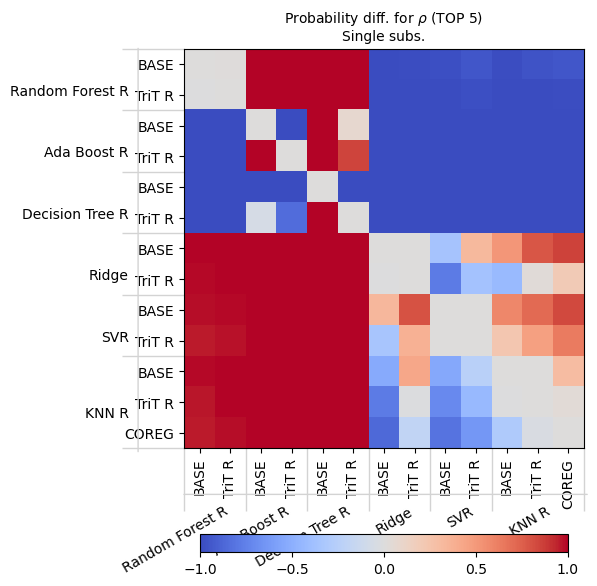

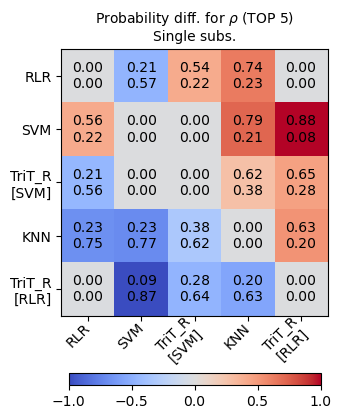

In [497]:
hits = heatmap(model_names, "spearman", datasets_1, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_spearman'] = best_models
hits = heatmap(best_models, "spearman", datasets_1, rope=0.01, print_probs=True, superaxis=False)

Model  Hits
0           r    12
1         svr    10
2     tritr_r     9
3   tritr_svm     9
4        knnr     9
5   tritr_knn     7
6         rfr     6
7    tritr_rf     5
8         cor     4
9    tritr_ab     3
10   tritr_dt     2
11        abr     1
12        dtr     0

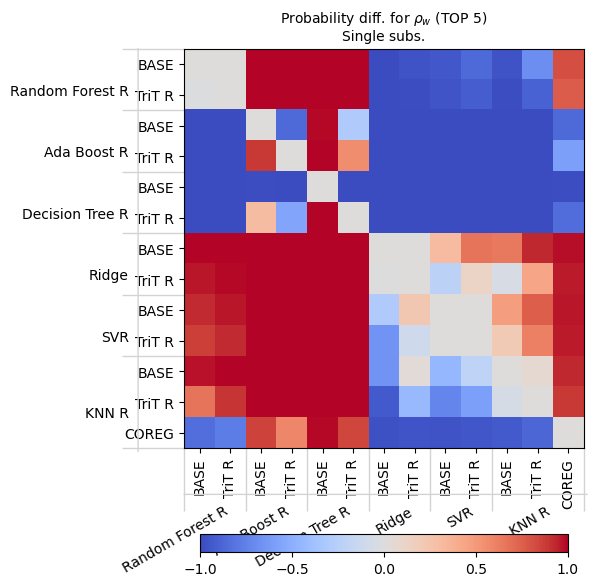

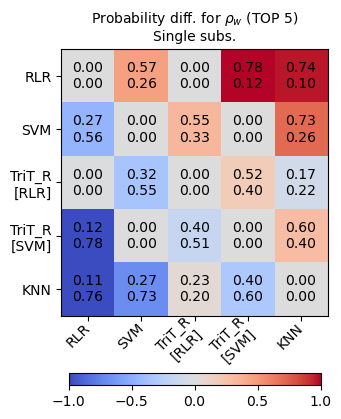

In [498]:
hits = heatmap(model_names, "wspearman", datasets_1, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_wspearman'] = best_models
hits = heatmap(best_models, "wspearman", datasets_1, rope=0.01, print_probs=True, superaxis=False)

# Training with full datasets
## Double-substitutions and multiple-substitutions datasets

Model  Hits
0         svr    11
1   tritr_svm    11
2    tritr_rf    10
3         rfr     9
4     tritr_r     8
5           r     7
6        knnr     6
7         cor     5
8   tritr_knn     4
9    tritr_dt     3
10        dtr     2
11   tritr_ab     1
12        abr     0

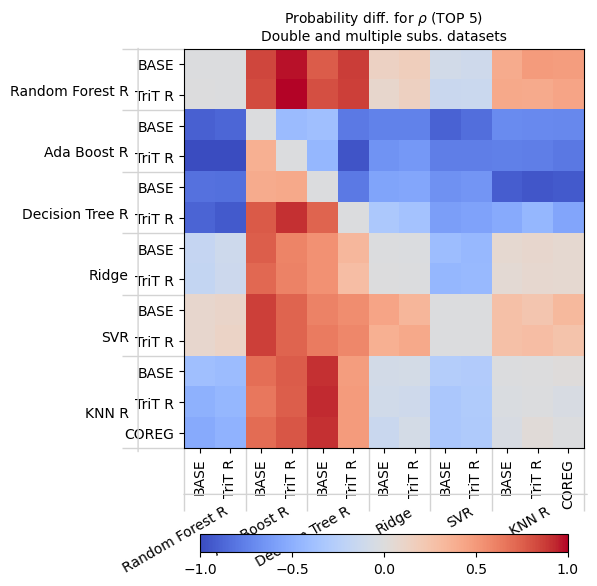

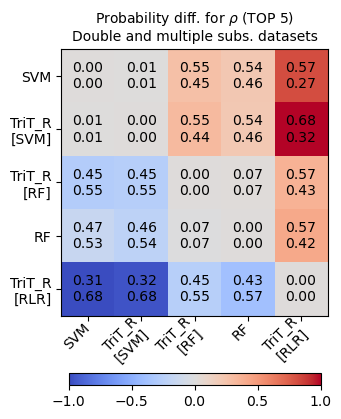

In [499]:
hits = heatmap(model_names, "spearman", datasets_2, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_spearman'] = best_models
hits = heatmap(best_models, "spearman", datasets_2, rope=0.01, print_probs=True, superaxis=False)

Model  Hits
0         svr    11
1   tritr_svm    11
2         rfr    10
3     tritr_r     9
4    tritr_rf     8
5           r     8
6        knnr     6
7   tritr_knn     5
8    tritr_dt     4
9         dtr     3
10   tritr_ab     2
11        abr     1
12        cor     0

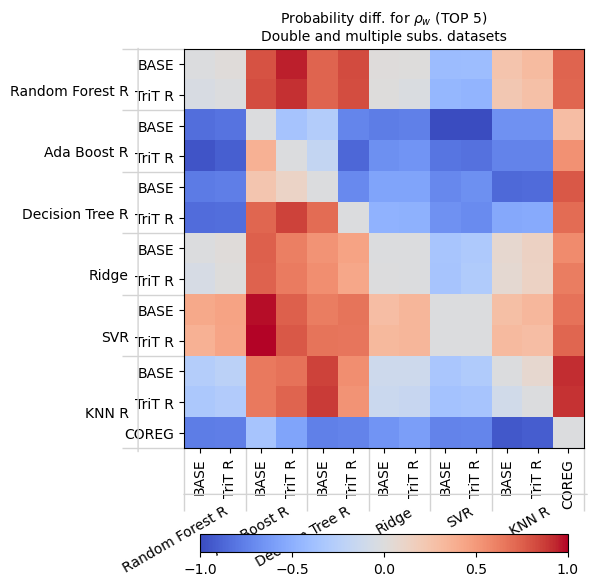

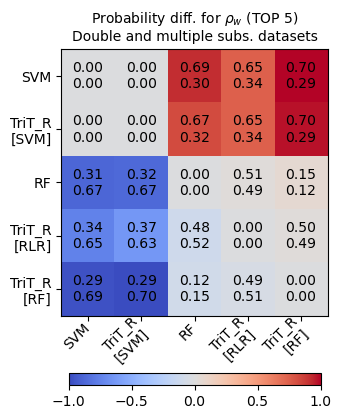

In [500]:
hits = heatmap(model_names, "wspearman", datasets_2, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_wspearman'] = best_models
hits = heatmap(best_models, "wspearman", datasets_2, rope=0.01, print_probs=True, superaxis=False)

# Training with full datasets
## Single-substitutions, double-substitutions and multiple-substitutions datasets

Model  Hits
0         svr    11
1   tritr_svm    11
2           r    10
3     tritr_r     8
4        knnr     8
5   tritr_knn     7
6         cor     6
7         rfr     5
8    tritr_rf     4
9    tritr_ab     3
10   tritr_dt     2
11        abr     1
12        dtr     0

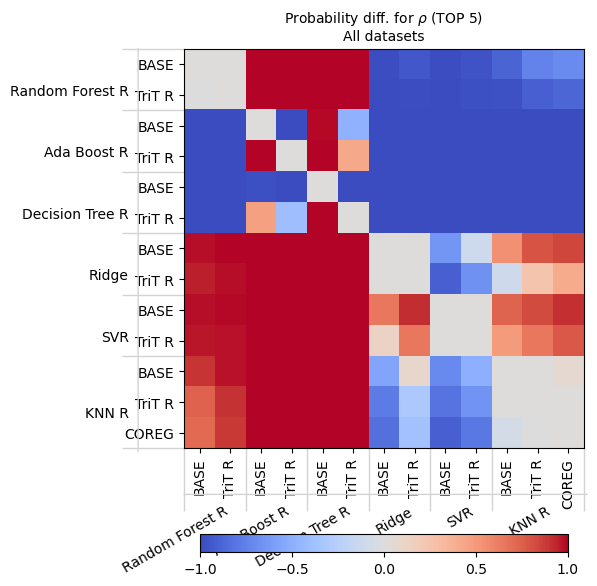

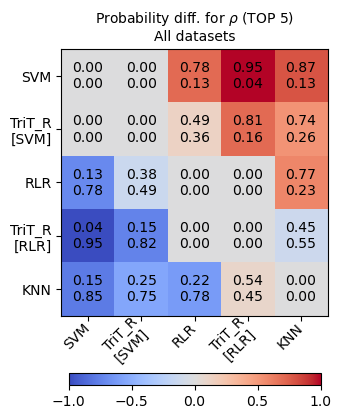

In [501]:
hits = heatmap(model_names, "spearman", datasets_1_2, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_spearman'] = best_models
hits = heatmap(best_models, "spearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False)

Model  Hits
0         svr    11
1           r    10
2   tritr_svm    10
3     tritr_r     9
4        knnr     8
5   tritr_knn     7
6         rfr     6
7    tritr_rf     5
8         cor     4
9    tritr_dt     3
10   tritr_ab     2
11        abr     1
12        dtr     0

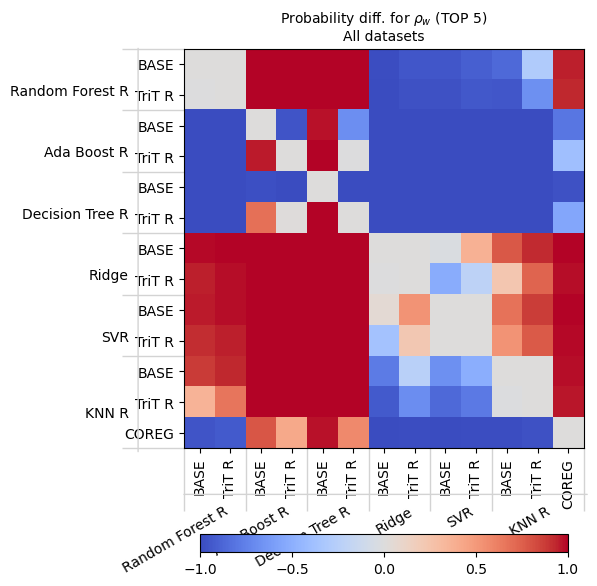

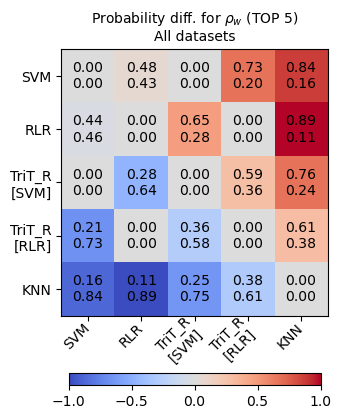

In [502]:
hits = heatmap(model_names, "wspearman", datasets_1_2, rope=0.01, superaxis=True)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_wspearman'] = best_models
hits = heatmap(best_models, "wspearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False)

# Training with few instances
## Single-substitutions datasets 

Model  Hits
0         svr    12
1   tritr_svm    11
2         rfr    10
3    tritr_rf     9
4           r     8
5         cor     7
6    tritr_ab     6
7         abr     5
8     tritr_r     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

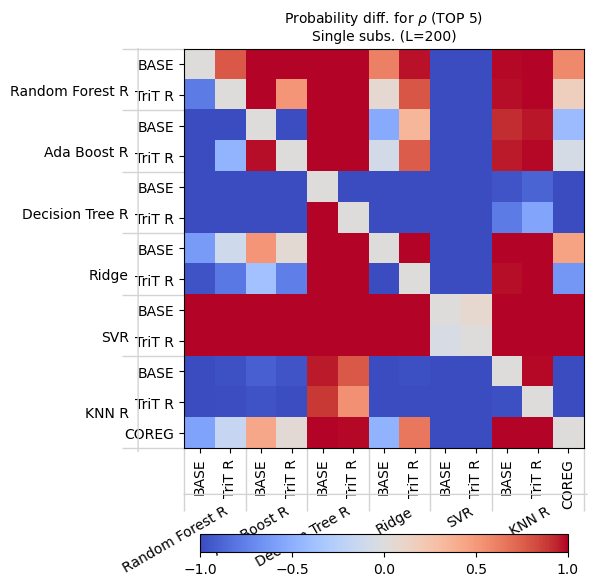

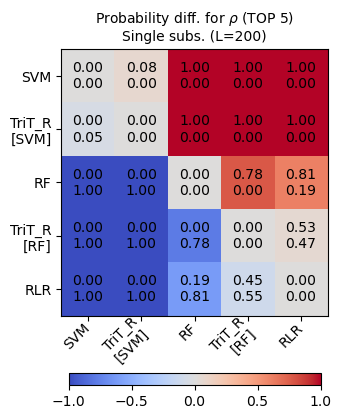

In [503]:
n = 200
hits = heatmap(model_names, "spearman", datasets_1, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_1, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         rfr    10
3    tritr_rf     9
4    tritr_ab     8
5           r     7
6         abr     6
7         cor     5
8     tritr_r     4
9        knnr     3
10   tritr_dt     2
11  tritr_knn     1
12        dtr     0

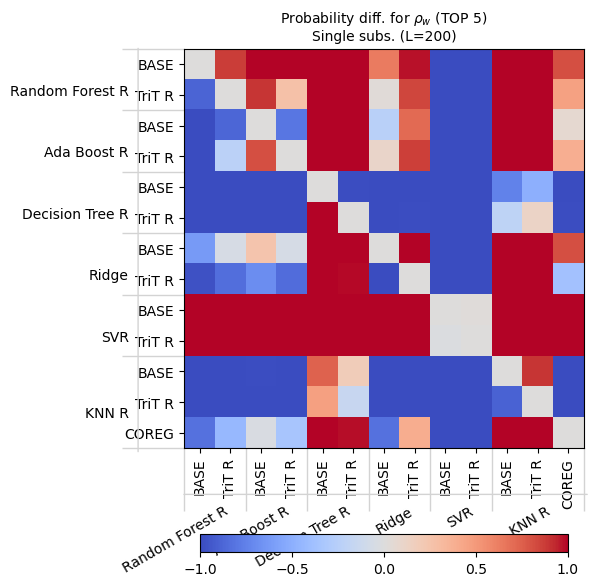

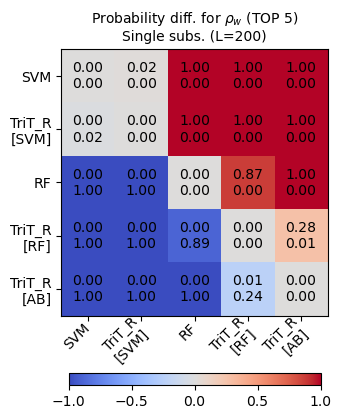

In [504]:
n = 200
hits = heatmap(model_names, "wspearman", datasets_1, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_1, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         cor    10
3         rfr     9
4         abr     8
5    tritr_ab     7
6           r     6
7    tritr_rf     5
8     tritr_r     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

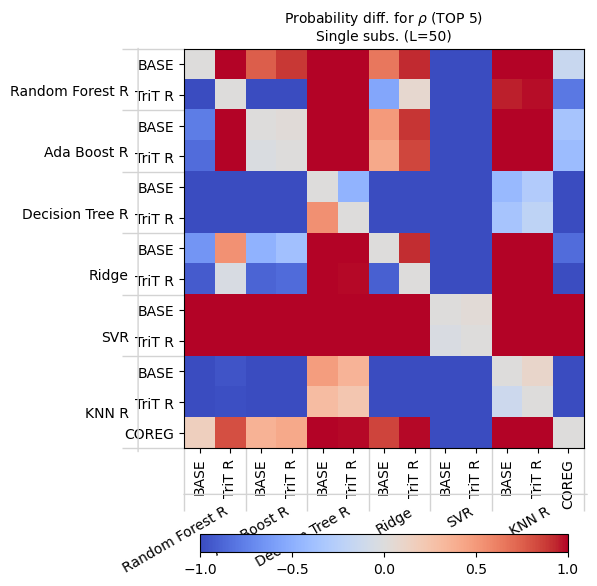

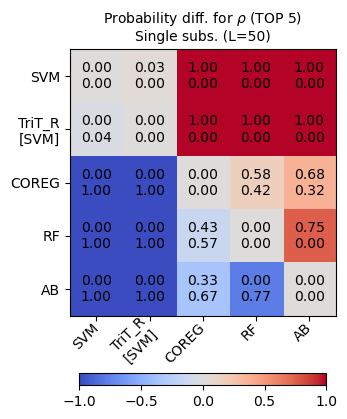

In [505]:
n = 50
hits = heatmap(model_names, "spearman", datasets_1, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_1, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         cor    10
3         rfr     9
4         abr     8
5    tritr_ab     7
6           r     6
7    tritr_rf     5
8     tritr_r     4
9        knnr     3
10        dtr     2
11   tritr_dt     2
12  tritr_knn     0

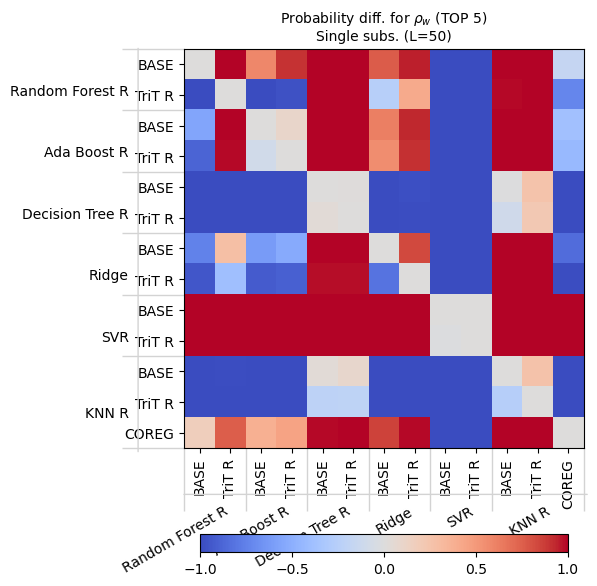

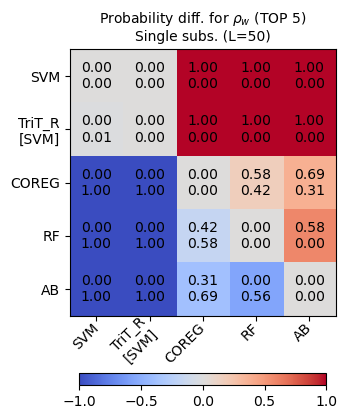

In [506]:
n=50
hits = heatmap(model_names, "wspearman", datasets_1, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['s_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_1, rope=0.01, print_probs=True, superaxis=False, n=n)

# Training with few instances
## Double-substitutions and multiple-substitutions datasets

Model  Hits
0         svr    12
1   tritr_svm    11
2           r    10
3     tritr_r     9
4         rfr     8
5    tritr_ab     7
6    tritr_rf     6
7         cor     6
8         abr     4
9        knnr     2
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

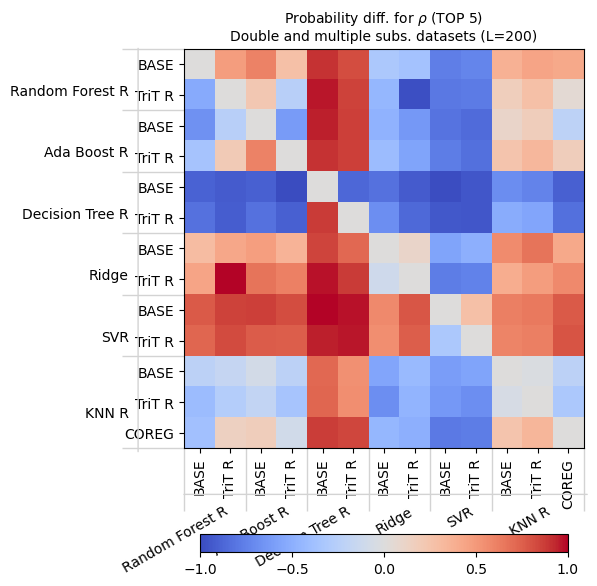

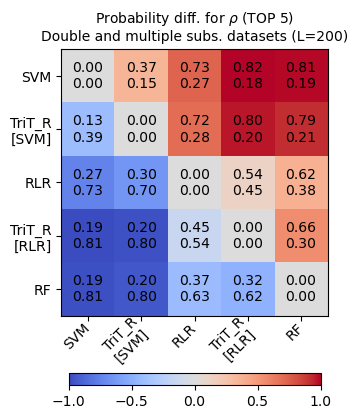

In [507]:
n=200
hits = heatmap(model_names, "spearman", datasets_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2           r    10
3     tritr_r     9
4         rfr     8
5    tritr_ab     7
6         cor     6
7    tritr_rf     5
8         abr     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

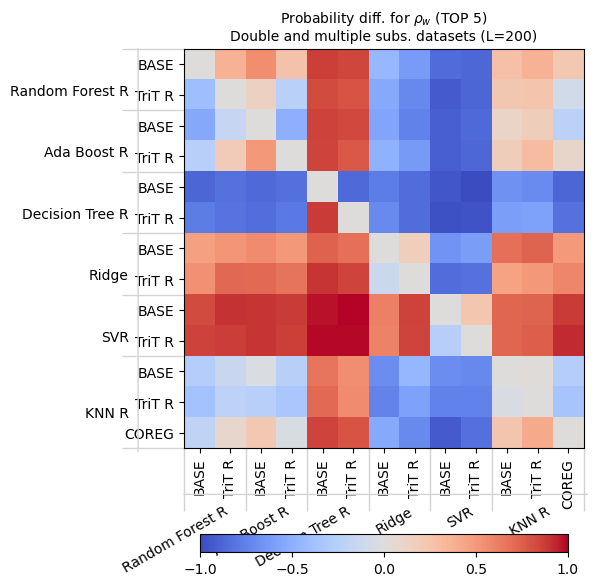

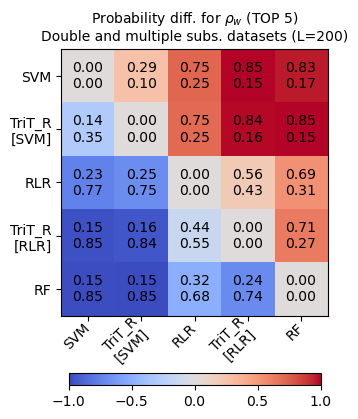

In [508]:
n=200
hits = heatmap(model_names, "wspearman", datasets_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2     tritr_r    10
3         cor     9
4         rfr     8
5    tritr_ab     7
6           r     6
7         abr     5
8    tritr_rf     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

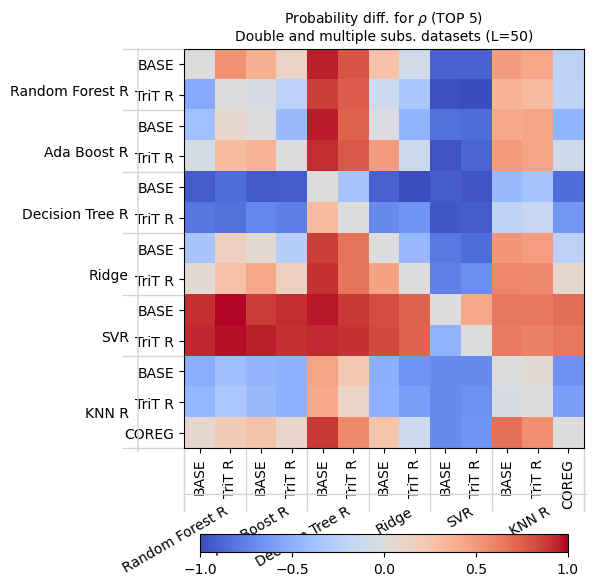

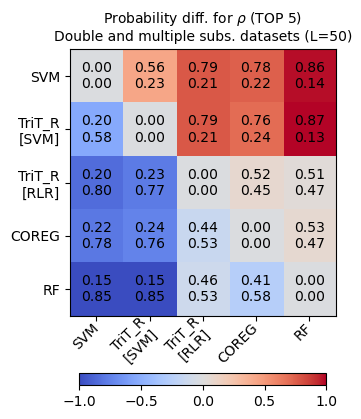

In [509]:
n=50
hits = heatmap(model_names, "spearman", datasets_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2     tritr_r    10
3         cor     9
4         rfr     8
5    tritr_ab     7
6           r     6
7         abr     5
8    tritr_rf     4
9        knnr     2
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

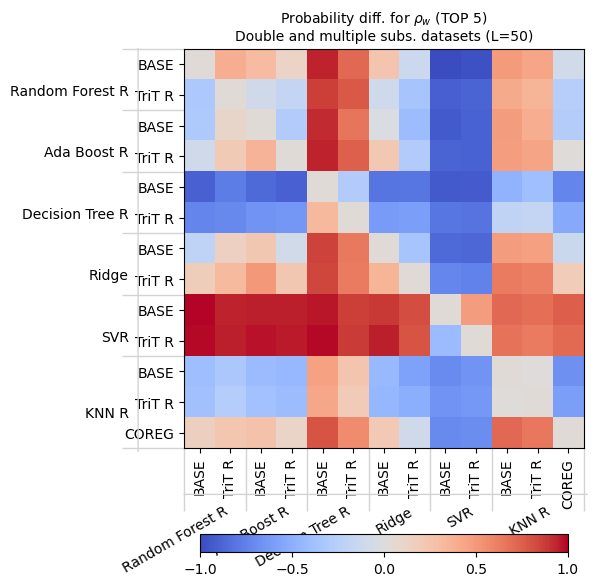

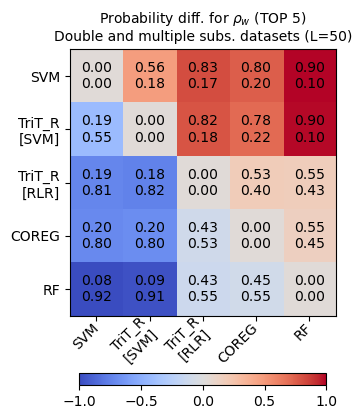

In [510]:
n=50
hits = heatmap(model_names, "wspearman", datasets_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_2, rope=0.01, print_probs=True, superaxis=False, n=n)

# Training with few instances
## Single-substitutions, double-substitutions and multiple-substitutions datasets

Model  Hits
0         svr    12
1   tritr_svm    11
2         rfr    10
3           r     9
4    tritr_rf     8
5         cor     7
6    tritr_ab     6
7         abr     5
8     tritr_r     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

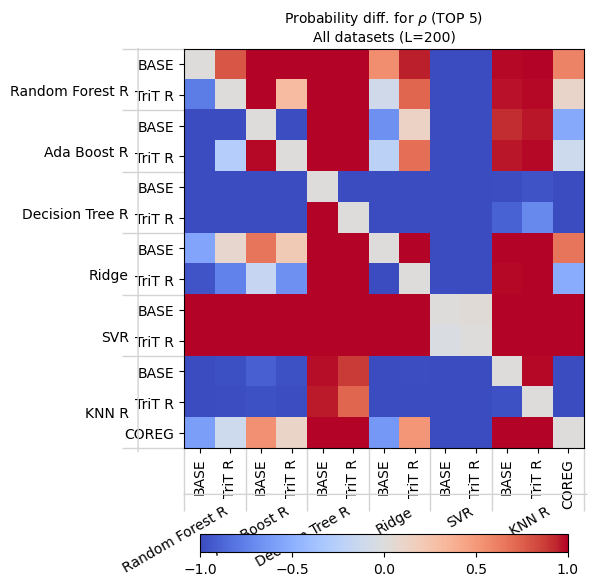

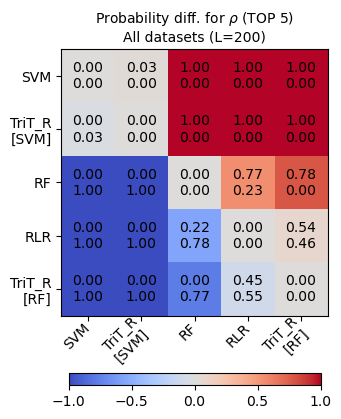

In [511]:
n=200
hits = heatmap(model_names, "spearman", datasets_1_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         rfr    10
3           r     9
4    tritr_rf     8
5    tritr_ab     7
6         cor     6
7         abr     5
8     tritr_r     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

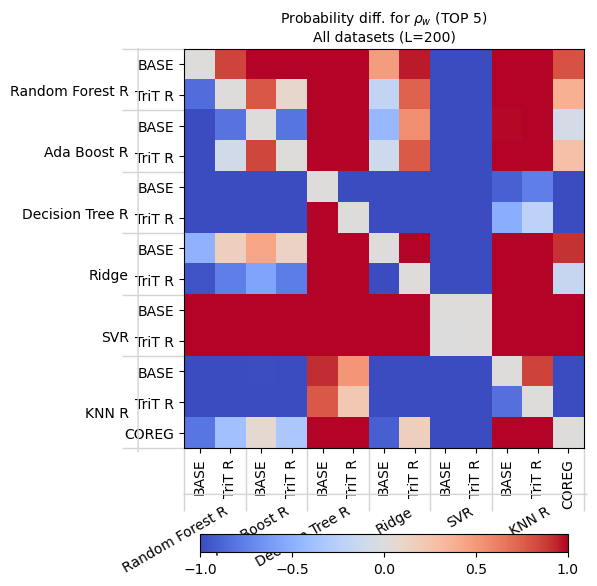

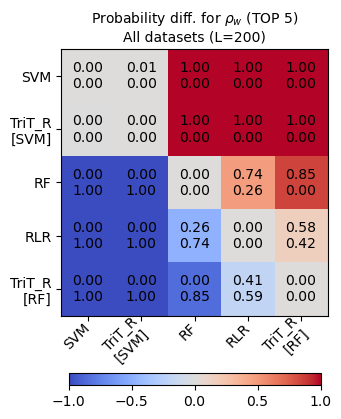

In [512]:
n=200
hits = heatmap(model_names, "wspearman", datasets_1_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         cor    10
3         rfr     9
4    tritr_ab     8
5         abr     7
6           r     6
7     tritr_r     5
8    tritr_rf     4
9        knnr     3
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

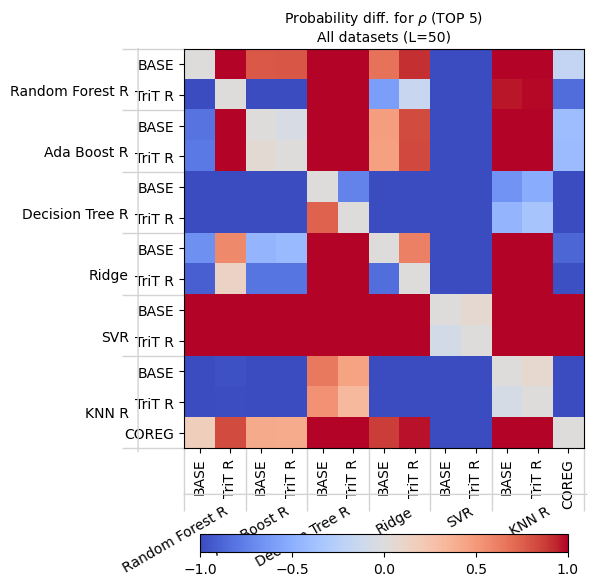

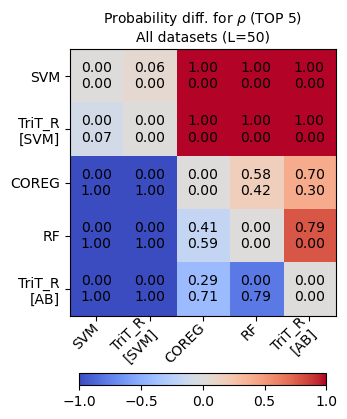

In [513]:
n=50
hits = heatmap(model_names, "spearman", datasets_1_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_spearman_'+str(n)] = best_models
hits = heatmap(best_models, "spearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False, n=n)

Model  Hits
0         svr    12
1   tritr_svm    11
2         cor    10
3         rfr     9
4         abr     8
5    tritr_ab     7
6           r     6
7    tritr_rf     5
8     tritr_r     4
9        knnr     3
10   tritr_dt     1
11  tritr_knn     1
12        dtr     0

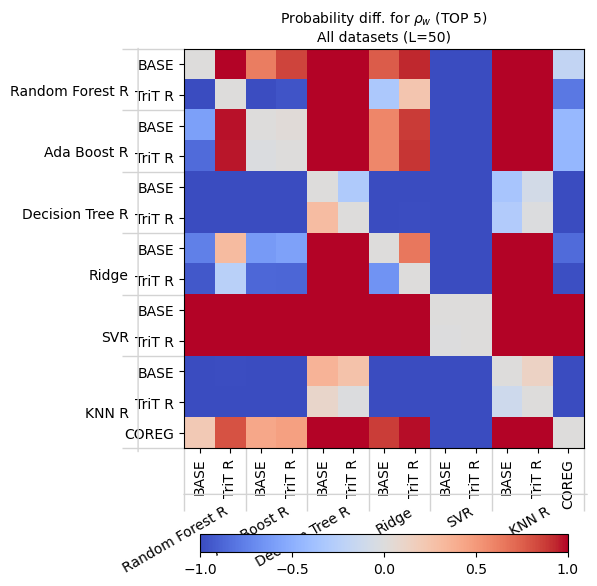

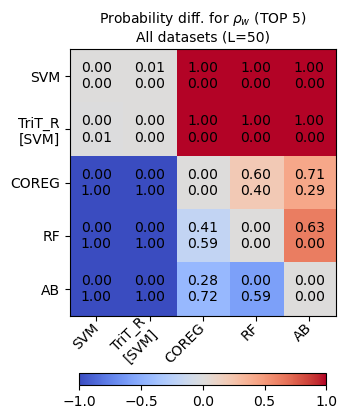

In [514]:
n=50
hits = heatmap(model_names, "wspearman", datasets_1_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['all_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_1_2, rope=0.01, print_probs=True, superaxis=False, n=n)

# Summary


In [515]:
#Execution of all previous cells is needed

best_models_dict

{'s_spearman': 0            r
 1          svr
 2    tritr_svm
 3         knnr
 4      tritr_r
 Name: Model, dtype: object,
 's_wspearman': 0            r
 1          svr
 2      tritr_r
 3    tritr_svm
 4         knnr
 Name: Model, dtype: object,
 'dm_spearman': 0          svr
 1    tritr_svm
 2     tritr_rf
 3          rfr
 4      tritr_r
 Name: Model, dtype: object,
 'dm_wspearman': 0          svr
 1    tritr_svm
 2          rfr
 3      tritr_r
 4     tritr_rf
 Name: Model, dtype: object,
 'all_spearman': 0          svr
 1    tritr_svm
 2            r
 3      tritr_r
 4         knnr
 Name: Model, dtype: object,
 'all_wspearman': 0          svr
 1            r
 2    tritr_svm
 3      tritr_r
 4         knnr
 Name: Model, dtype: object,
 's_spearman_200': 0          svr
 1    tritr_svm
 2          rfr
 3     tritr_rf
 4            r
 Name: Model, dtype: object,
 's_wspearman_200': 0          svr
 1    tritr_svm
 2          rfr
 3     tritr_rf
 4     tritr_ab
 Name: Model, dtype: object

In [516]:
from matplotlib import cm
import matplotlib

def summary(best_models_dict, metric_name, rope=0.01):
    
    path = f'results/bayesian_posteriors_rope='
    
    titles_dict = {'spearman': r"$\rho$", 
                   'wspearman': r"$\rho_w$", 
                   'wtau': r"$\tau_w$"}

    best_models_list = [f's_{metric_name}', f'dm_{metric_name}', f'all_{metric_name}',
                        f's_{metric_name}_200', f'dm_{metric_name}_200', f'all_{metric_name}_200',
                        f's_{metric_name}_50', f'dm_{metric_name}_50', f'all_{metric_name}_50']
    titles = ['Single subs.', 'Double and multiple subs. datasets', 
              'All datasets',
              'Single subs. (L=200)', 'Double and multiple subs. datasets (L=200)', 'All datasets (L=200)', 
              'Single subs. (L=50)', 'Double and multiple subs. datasets (L=50)', 'All datasets (L=50)'
             ]
    
    columns = 3
    rows = math.ceil(len(titles)/columns)
    fig, axs = plt.subplots(rows, columns, figsize=(10,10), constrained_layout = True)
    plt.suptitle(f'Probability diff. for {titles_dict[metric_name]} (TOP 5)')

    for i, (key, title) in enumerate(zip(best_models_list, titles)): 
        model_names = best_models_dict[key]
        
        split_key = key.split('_')
        datasets = split_key[0]
        if len(split_key) == 2: 
            n=None
        else: 
            n=int(split_key[2])

        heatmap = []
        probabilities = []
        for idx, model in enumerate(model_names): 
            heatmap_row = []
            probs_row = []
            for idx2, model2 in enumerate(model_names):

                if idx != idx2: 
                    if n==None: 
                        posterior = pk.load(open(path+f'{str(rope)}_{model}_{model2}_{metric_name}_{datasets}.pk', 'rb'))
                    else: 
                        posterior = pk.load(open(path+f'{str(rope)}_{model}_{model2}_{metric_name}_{datasets}_{str(n)}_instances.pk', 'rb'))
                    probs = posterior.probs()
                    heatmap_row.append(probs[0]-probs[2])
                    probs_row.append((probs[0], probs[2]))

                else: 
                    heatmap_row.append(0)
                    probs_row.append((0, 0))
            heatmap.append(heatmap_row)
            probabilities.append(probs_row)

        column = i%columns 
        row = i//columns
        
        im = axs[row, column].imshow(heatmap, cmap = 'coolwarm', vmin=-1, vmax=1)

        tick_names = [model_complete_names_map[model] for model in model_names]
        rotation = 50

        # Show all ticks and label them with the respective list entries
        axs[row, column].set_xticks(np.arange(len(model_names)), labels=tick_names, verticalalignment='center', 
                                    rotation=rotation, ha='right', rotation_mode='anchor')
        axs[row, column].set_yticks(np.arange(len(model_names)), labels=tick_names)


        for i in range(len(probabilities)): 
            for j in range(len(probabilities[0])): 
                probL, probR = probabilities[i][j]
                if i==j: 
                    t = ''
                else: 
                    t = f'{probL:.2f}\n{probR:.2f}'
                text = axs[row, column].text(j,i, t, ha='center', va='center')
                
        axs[row, column].set_title(title, fontsize=9)


    # Create colorbar
    norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=axs, 
                 location='bottom', ticks=np.linspace(-1,1, 5), shrink=0.7, pad=0.015)

    
    figpath = f'figs/summary_{metric_name}_top5.pdf'

    fig.savefig(figpath, bbox_inches='tight', format='pdf')
    

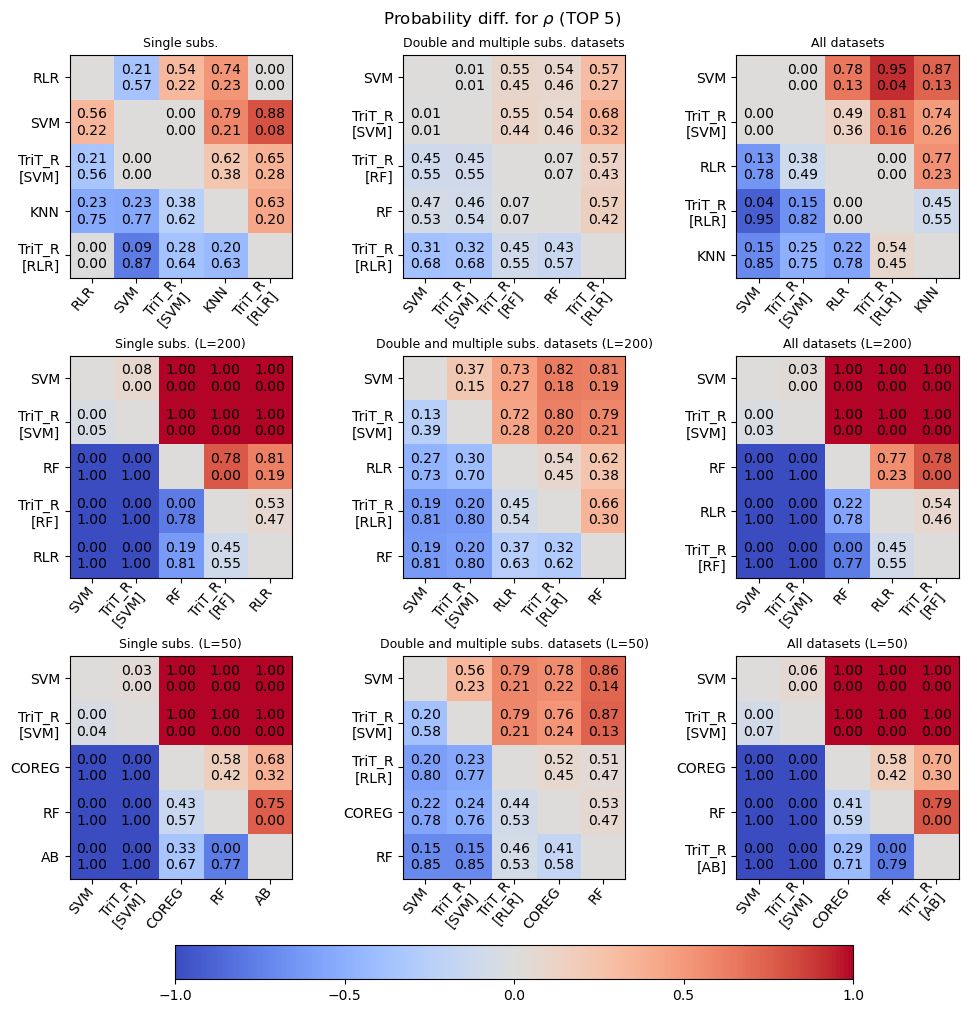

In [517]:
summary(best_models_dict, 'spearman', rope=0.01)

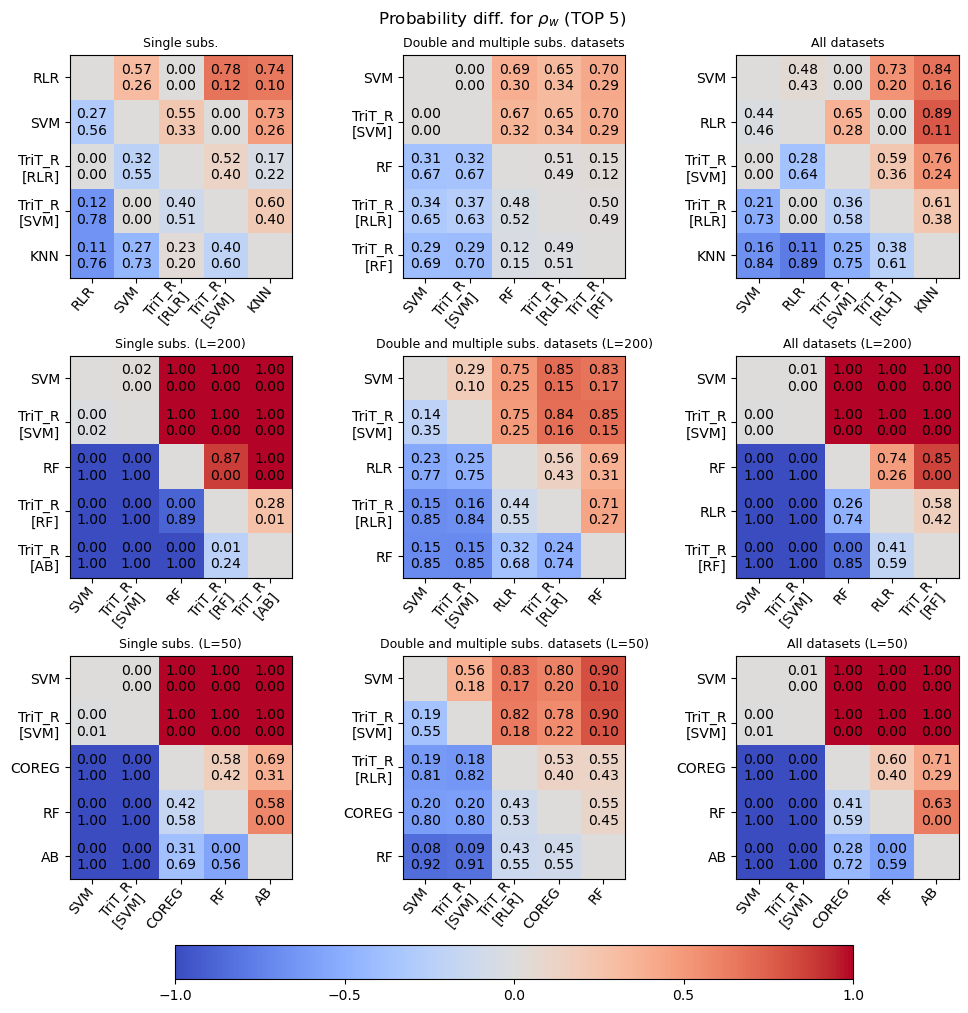

In [518]:
summary(best_models_dict, 'wspearman', rope=0.01)

In [519]:
def show_case(best_models_dict, metric_name, rope=0.01, case=1):
    
    path = f'results/bayesian_posteriors_rope='
    
    titles_dict = {'spearman': r"$\rho$", 
                   'wspearman': r"$\rho_w$", 
                   'wtau': r"$\tau_w$"}

    best_models_list = [f's_{metric_name}', f'dm_{metric_name}', f'all_{metric_name}',
                        f's_{metric_name}_200', f'dm_{metric_name}_200', f'all_{metric_name}_200',
                        f's_{metric_name}_50', f'dm_{metric_name}_50', f'all_{metric_name}_50']
    titles = ['Single subs.', 'Double and multiple subs. datasets', 
              'All datasets',
              'Single subs. (L=200)', 'Double and multiple subs. datasets (L=200)', 'All datasets (L=200)', 
              'Single subs. (L=50)', 'Double and multiple subs. datasets (L=50)', 'All datasets (L=50)'
             ]
    
    fig, axs = plt.subplots(figsize=(4,4), constrained_layout = True)
    plt.suptitle(f'Probability diff. for {titles_dict[metric_name]} (TOP 5)')

    for i, (key, title) in enumerate(zip(best_models_list, titles)): 
        if i+1 == case: 
            model_names = best_models_dict[key]

            split_key = key.split('_')
            datasets = split_key[0]
            if len(split_key) == 2: 
                n=None
            else: 
                n=int(split_key[2])

            heatmap = []
            probabilities = []
            for idx, model in enumerate(model_names): 
                heatmap_row = []
                probs_row = []
                for idx2, model2 in enumerate(model_names):

                    if idx != idx2: 
                        if n==None: 
                            posterior = pk.load(open(path+f'{str(rope)}_{model}_{model2}_{metric_name}_{datasets}.pk', 'rb'))
                        else: 
                            posterior = pk.load(open(path+f'{str(rope)}_{model}_{model2}_{metric_name}_{datasets}_{str(n)}_instances.pk', 'rb'))
                        probs = posterior.probs()
                        heatmap_row.append(probs[0]-probs[2])
                        probs_row.append((probs[0], probs[2]))

                    else: 
                        heatmap_row.append(0)
                        probs_row.append((0, 0))
                heatmap.append(heatmap_row)
                probabilities.append(probs_row)

            plt.imshow(heatmap, cmap = 'coolwarm', vmin=-1, vmax=1)

            tick_names = [model_complete_names_map[model] for model in model_names]
            rotation = 50

            # Show all ticks and label them with the respective list entries
            plt.xticks(np.arange(len(model_names)), labels=tick_names, verticalalignment='center', 
                                        rotation=rotation, ha='right', rotation_mode='anchor')
            plt.yticks(np.arange(len(model_names)), labels=tick_names)


            for i in range(len(probabilities)): 
                for j in range(len(probabilities[0])): 
                    probL, probR = probabilities[i][j]
                    if i==j: 
                        t = ''
                    else: 
                        t = f'{probL:.2f}\n{probR:.2f}'
                    text = plt.text(j,i, t, ha='center', va='center')

            plt.title(title, fontsize=9)


    # Create colorbar
    norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=axs, 
                 location='bottom', ticks=np.linspace(-1,1, 5), shrink=0.7, pad=0.015)

    
    figpath = f'figs/case_{case}_{metric_name}_top5.pdf'

    fig.savefig(figpath, bbox_inches='tight', format='pdf')

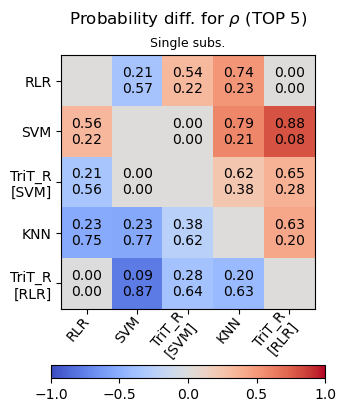

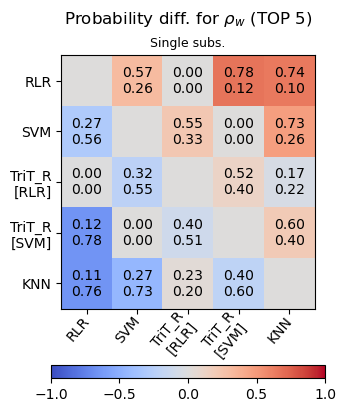

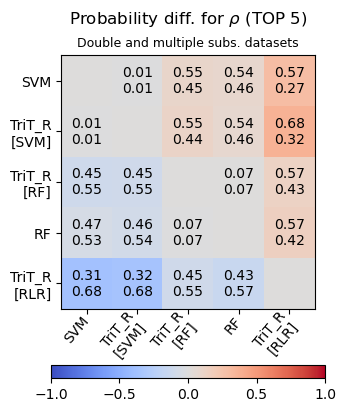

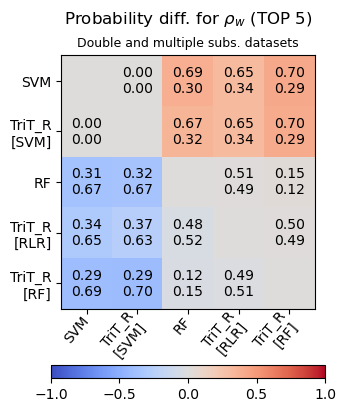

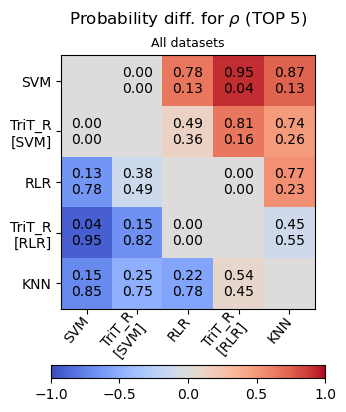

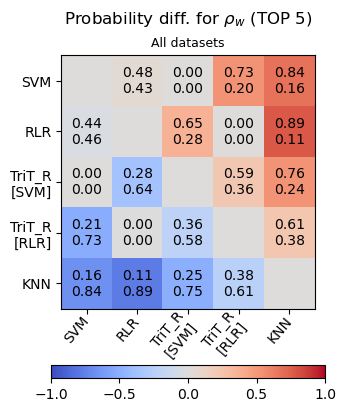

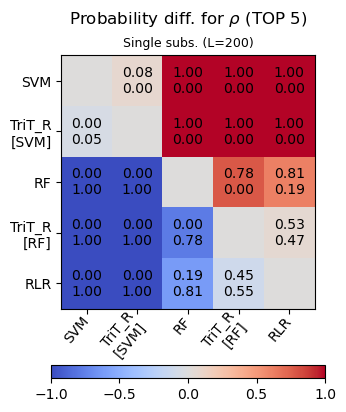

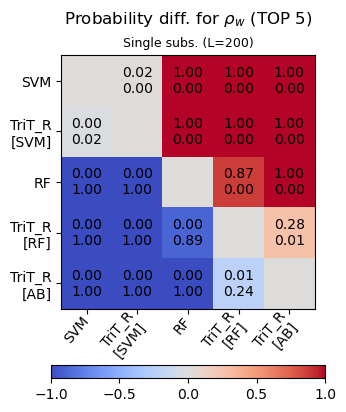

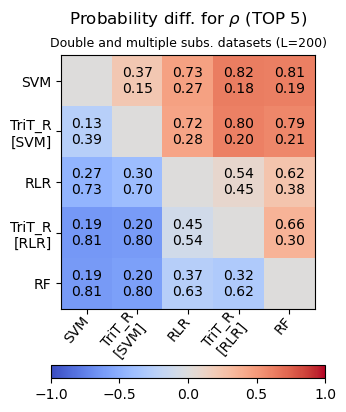

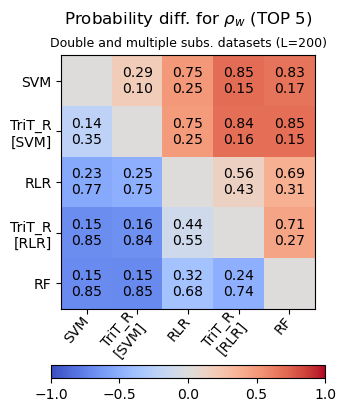

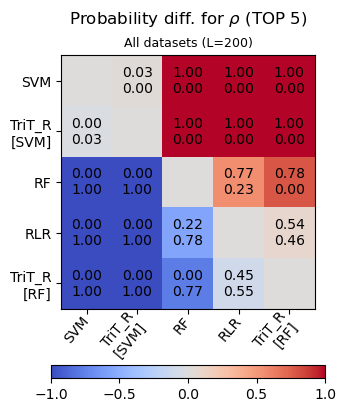

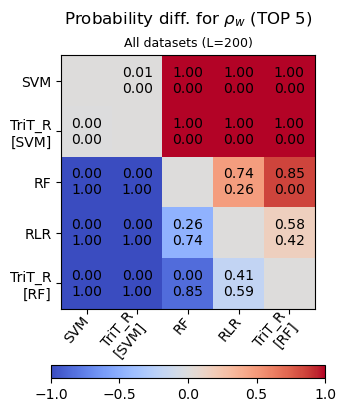

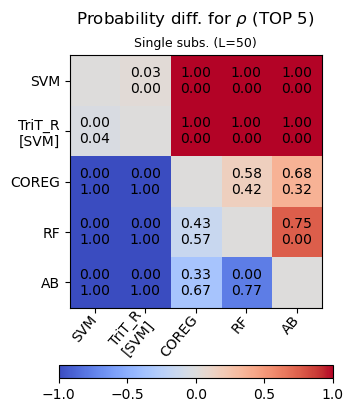

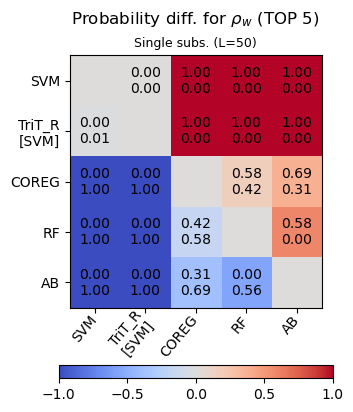

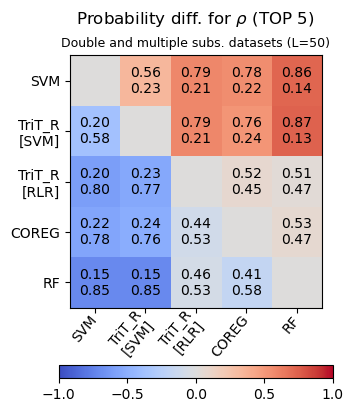

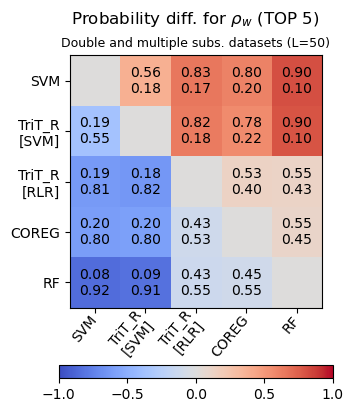

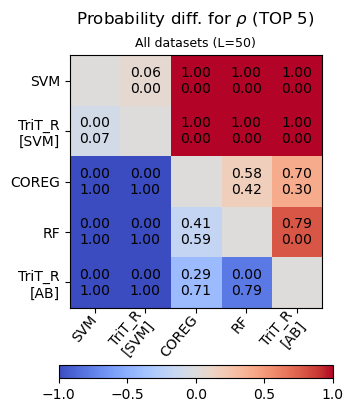

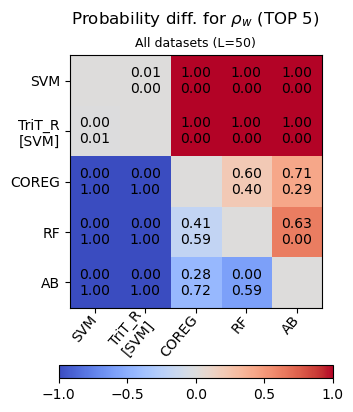

In [520]:
for case in range(1,10): 
    for metric in ['spearman', 'wspearman']:

        show_case(best_models_dict, metric, rope=0.01, case=case)

Model  Hits
0         svr    12
1   tritr_svm    11
2     tritr_r    10
3         cor     9
4         rfr     8
5    tritr_ab     7
6           r     6
7         abr     5
8    tritr_rf     4
9        knnr     2
10  tritr_knn     2
11   tritr_dt     1
12        dtr     0

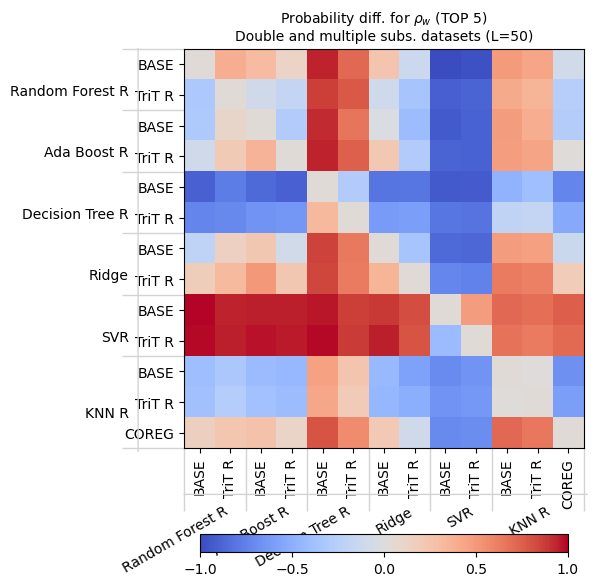

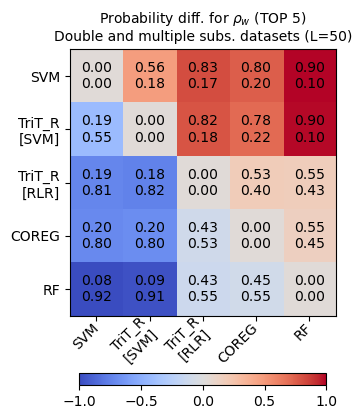

In [521]:
n=50
hits = heatmap(model_names, "wspearman", datasets_2, rope=0.01, superaxis=True, n=n)

hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True )
df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])
display(df)

best_models = df['Model'][:5]
best_models_dict['dm_wspearman_'+str(n)] = best_models
hits = heatmap(best_models, "wspearman", datasets_2, rope=0.01, print_probs=True, superaxis=False, n=n)

In [522]:
def calculate_hits(model_names, metric_name, datasets, rope=0.01, n=None):
    
    path = f'results/bayesian_posteriors_rope='
    rope = str(rope)
    
    if len(datasets) > 2: 
        datasets = 's'
    else: 
        datasets = 'dm'

    hits = []
    for idx, model in enumerate(model_names): 
        counter = 0
        for idx2, model2 in enumerate(model_names):
            if idx != idx2: 
                if n==None: 
                    filename = path+f'{rope}_{model}_{model2}_{metric_name}_{datasets}.pk'
                    posterior = pk.load(open(filename, 'rb'))
                else: 
                    filename = path+f'{rope}_{model}_{model2}_{metric_name}_{datasets}_{str(n)}_instances.pk'
                    posterior = pk.load(open(filename, 'rb'))
                probs = posterior.probs()


                if probs[0]-probs[2] > 0: 
                    counter+=1

        hits.append((model, counter)) 
        
    return hits

# MERGE

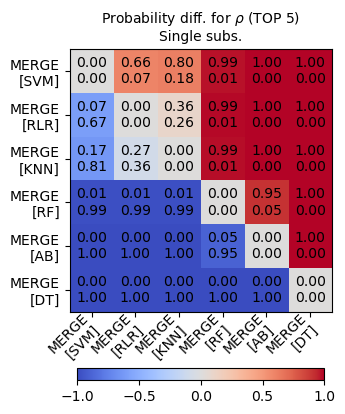

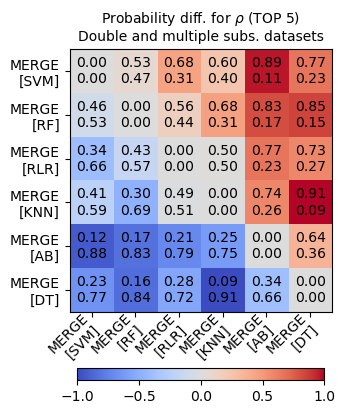

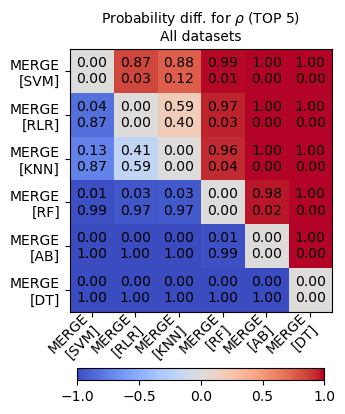

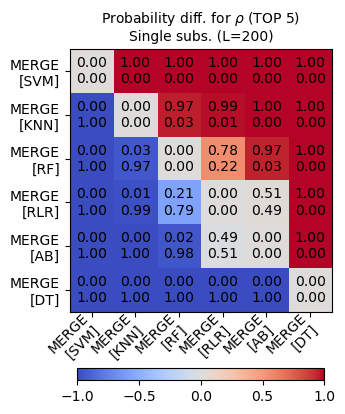

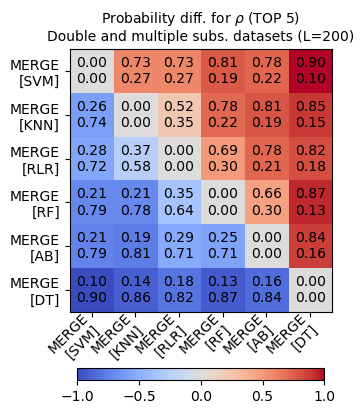

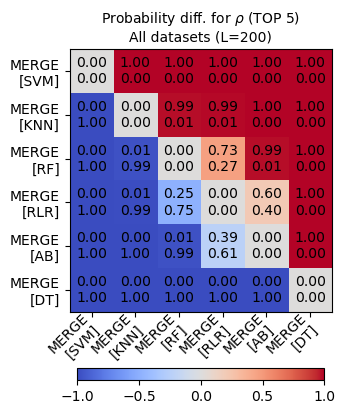

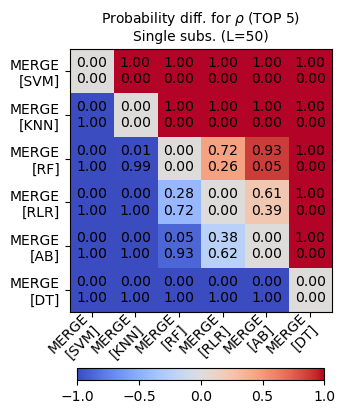

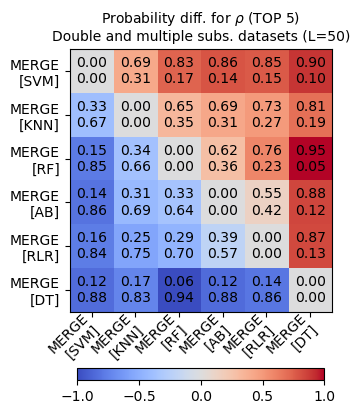

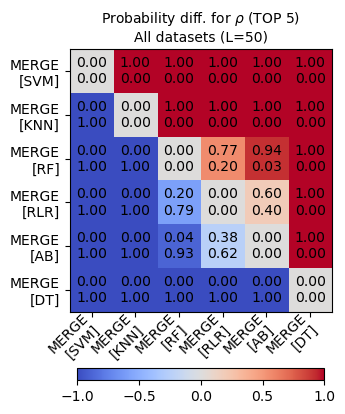

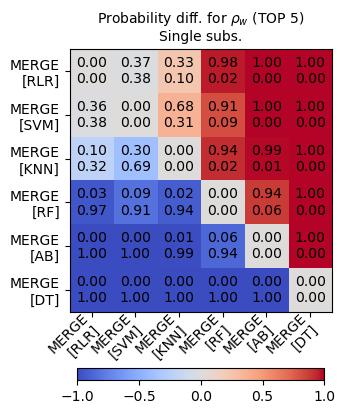

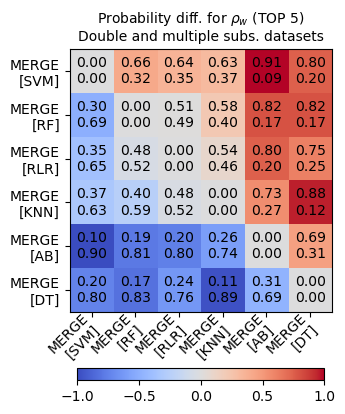

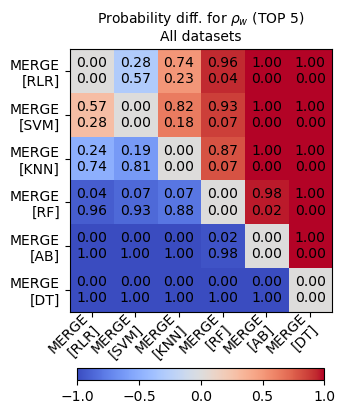

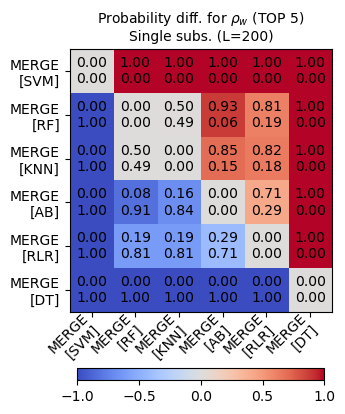

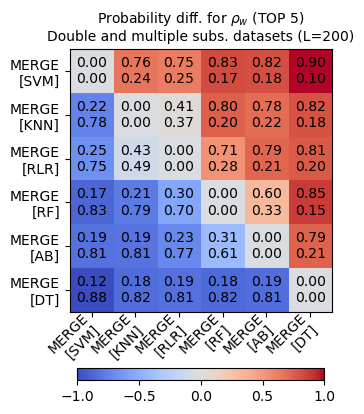

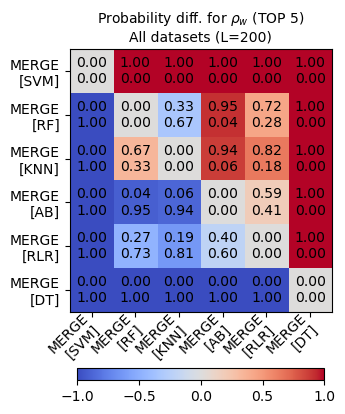

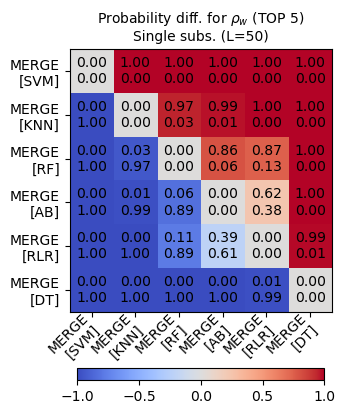

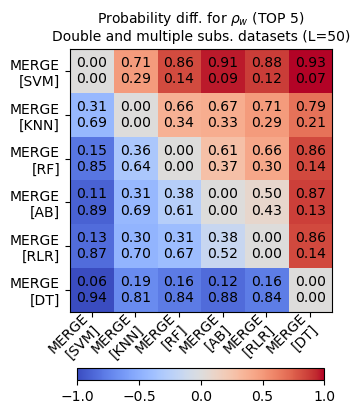

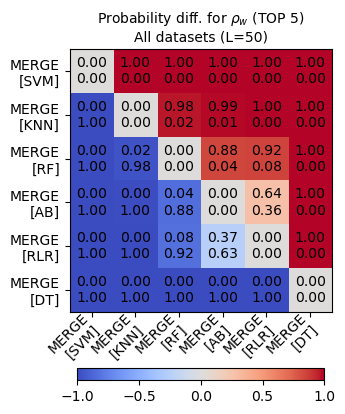

In [523]:
for metric in ['spearman', 'wspearman']: 
    for n in [None, 200, 50]: 
        for datasets in [datasets_1, datasets_2, datasets_1_2]:

            merge_models = ['merge_rf', 'merge_ab', 'merge_dt', 'merge_r', 'merge_svm', 'merge_knn']
            hits = calculate_hits(merge_models, metric, datasets, rope=0.01, n=n)

            hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True)
            df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])

            merge_models = df['Model']
            file_name = f'heatmap_merge_{metric}'
            if n!=None: 
                file_name += f'_{n}'
            if len(datasets) == 2: 
                file_name += '_dm'
            elif len(datasets)==17: 
                file_name += '_s'
            else: 
                file_name += '_all'
            hits = heatmap(merge_models, metric, datasets, rope=0.01, n=n, 
                           superaxis=False, print_probs=True, file_name=file_name)

# Unirep

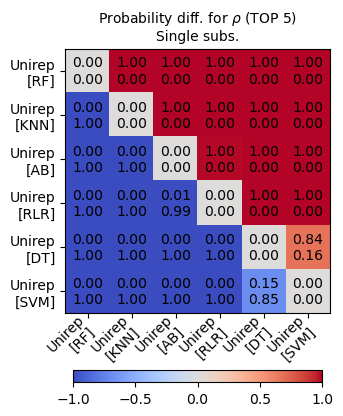

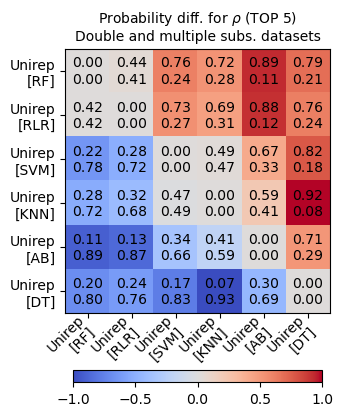

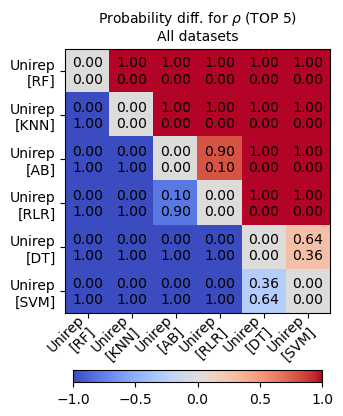

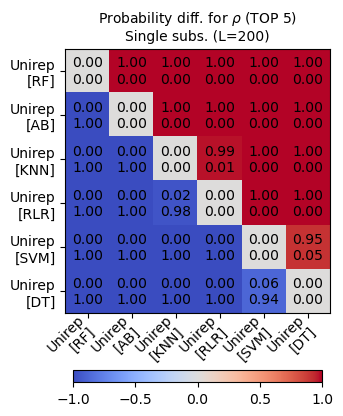

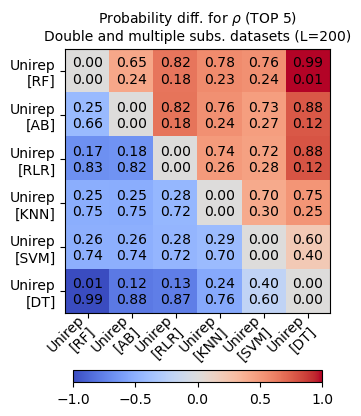

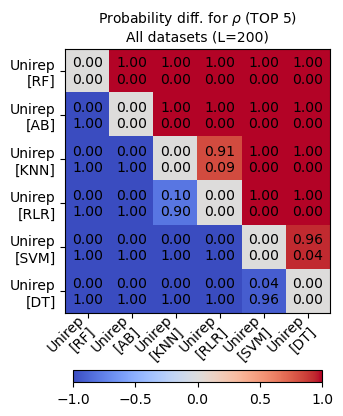

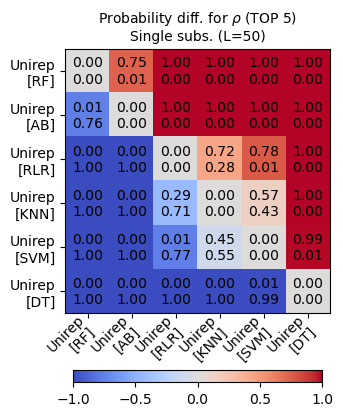

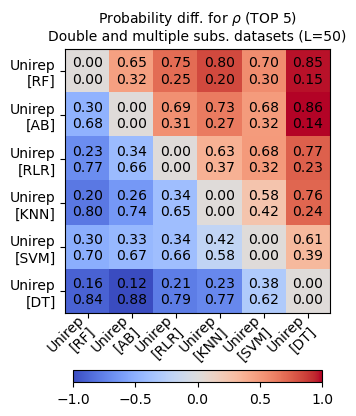

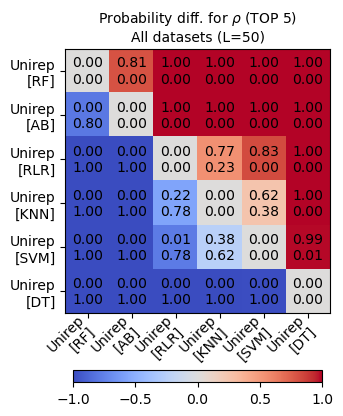

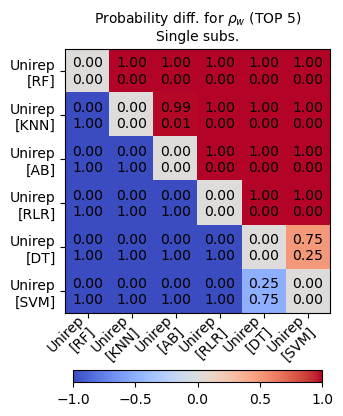

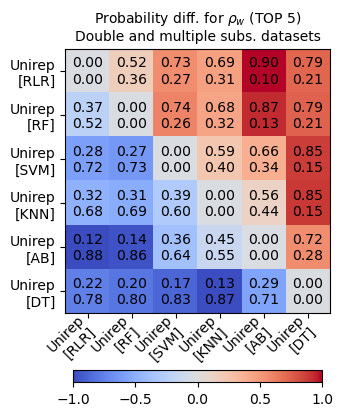

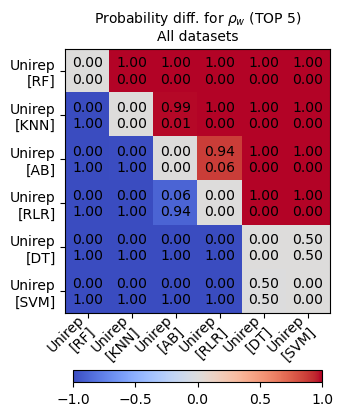

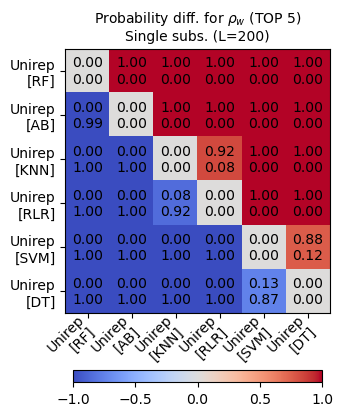

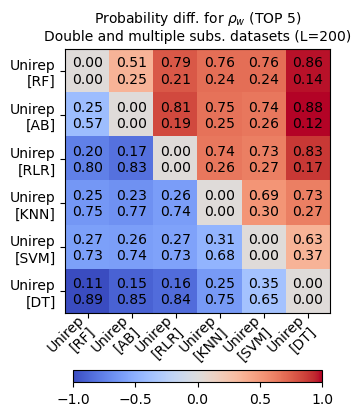

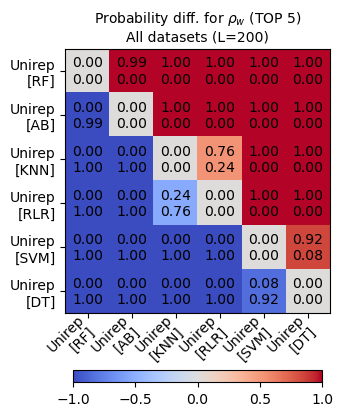

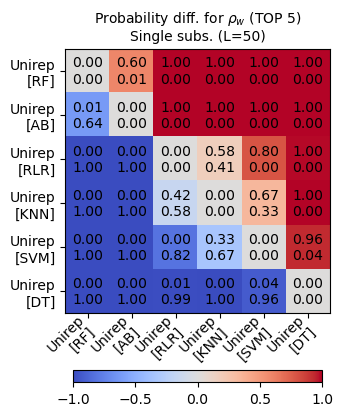

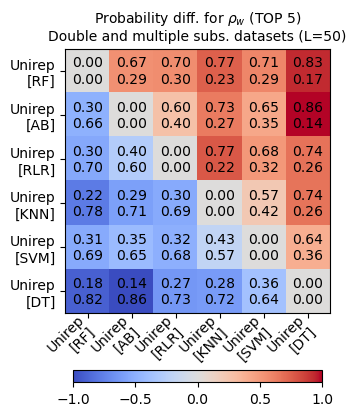

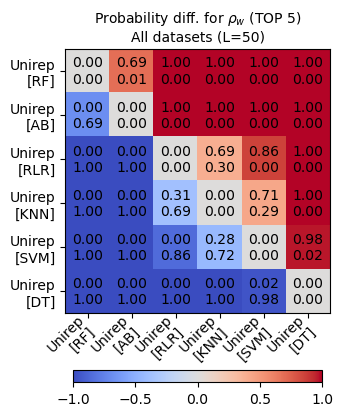

In [524]:
for metric in ['spearman', 'wspearman']: 
    for n in [None, 200, 50]: 
        for datasets in [datasets_1, datasets_2, datasets_1_2]:

            unirep_models = ['unirep_rf', 'unirep_ab', 'unirep_dt', 'unirep_r', 'unirep_svm', 'unirep_knn']
            hits = calculate_hits(unirep_models, metric, datasets, rope=0.01, n=n)

            hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True)
            df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])

            unirep_models = df['Model']
            file_name = f'heatmap_unirep_{metric}'
            if n!=None: 
                file_name += f'_{n}'
            if len(datasets) == 2: 
                file_name += '_dm'
            elif len(datasets)==17: 
                file_name += '_s'
            else: 
                file_name += '_all'
            hits = heatmap(unirep_models, metric, datasets, rope=0.01, n=n, 
                           superaxis=False, print_probs=True, file_name=file_name)

# eUnirep

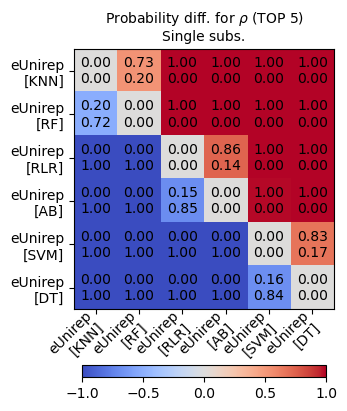

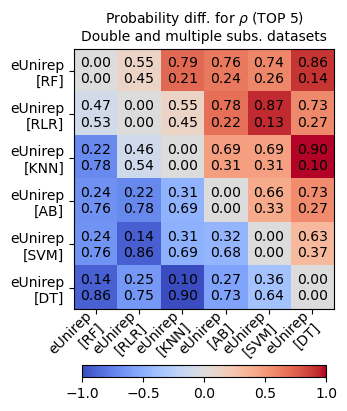

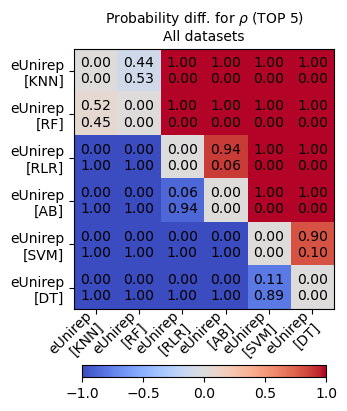

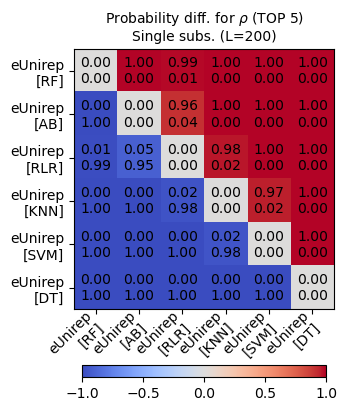

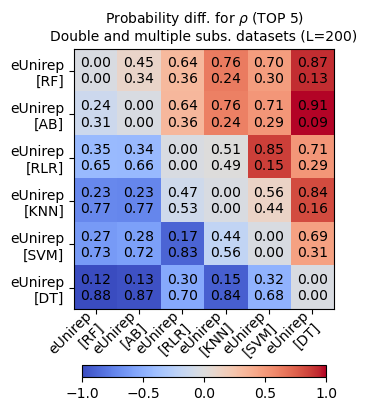

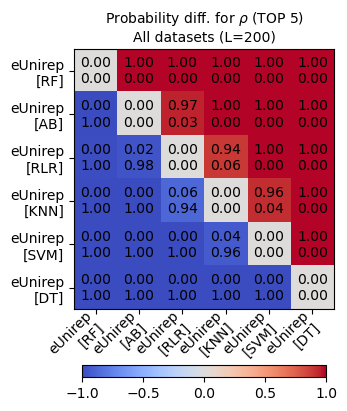

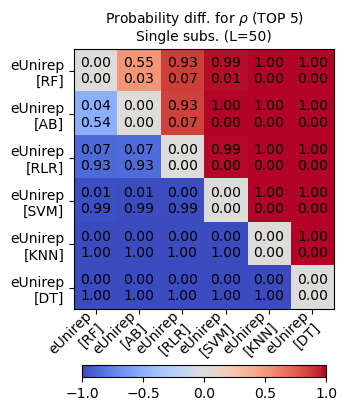

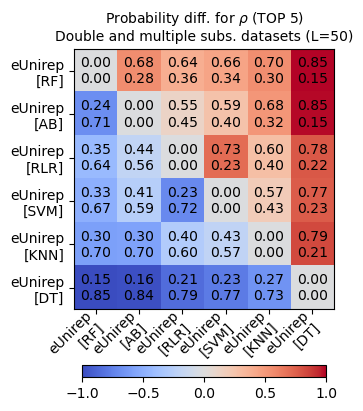

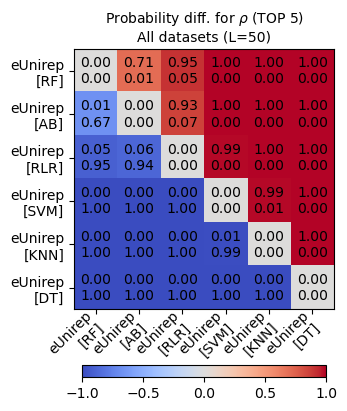

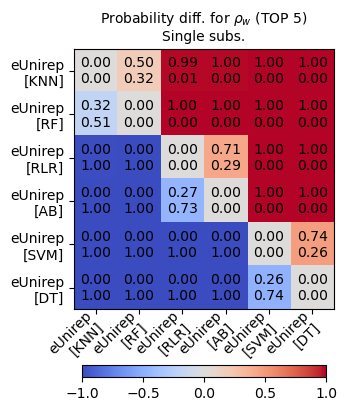

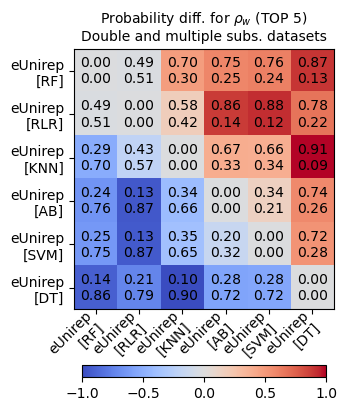

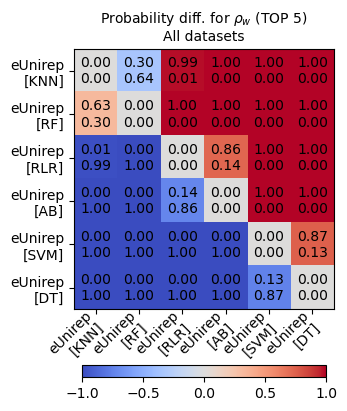

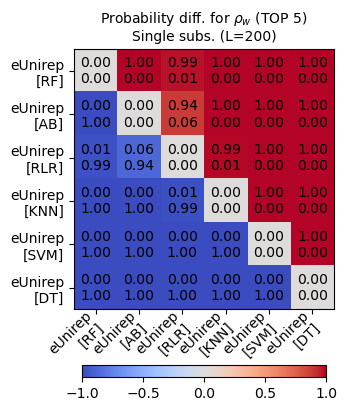

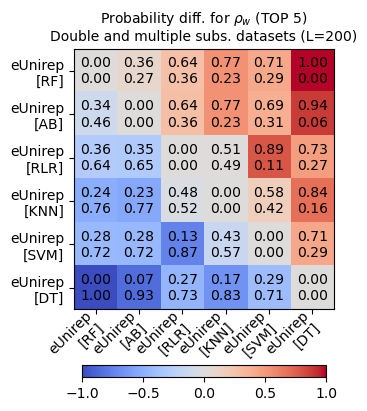

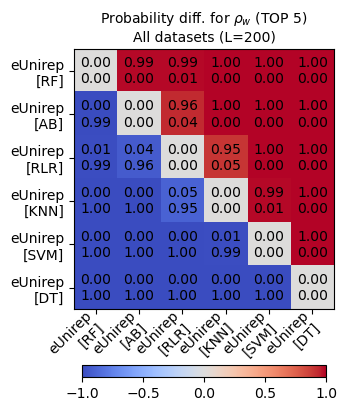

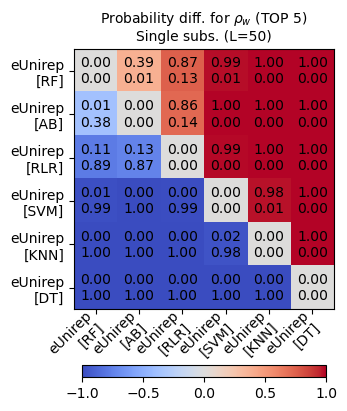

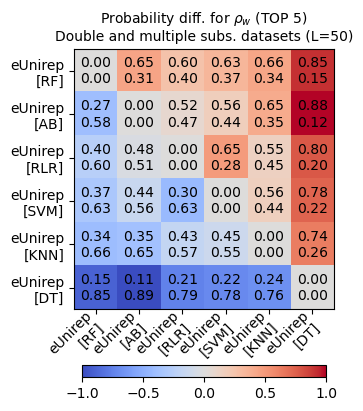

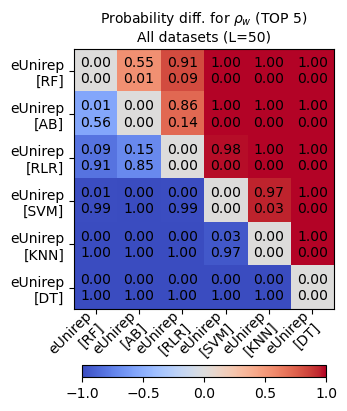

In [525]:
for metric in ['spearman', 'wspearman']: 
    for n in [None, 200, 50]: 
        for datasets in [datasets_1, datasets_2, datasets_1_2]:

            eunirep_models = ['eunirep_rf', 'eunirep_ab', 'eunirep_dt', 'eunirep_r', 'eunirep_svm', 'eunirep_knn']
            hits = calculate_hits(eunirep_models, metric, datasets, rope=0.01, n=n)

            hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True)
            df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])

            eunirep_models = df['Model']
            file_name = f'heatmap_eunirep_{metric}'
            if n!=None: 
                file_name += f'_{n}'
            if len(datasets) == 2: 
                file_name += '_dm'
            elif len(datasets)==17: 
                file_name += '_s'
            else: 
                file_name += '_all'
            hits = heatmap(eunirep_models, metric, datasets, rope=0.01, n=n, 
                           superaxis=False, print_probs=True, file_name=file_name)

# State-of-the-art comparison

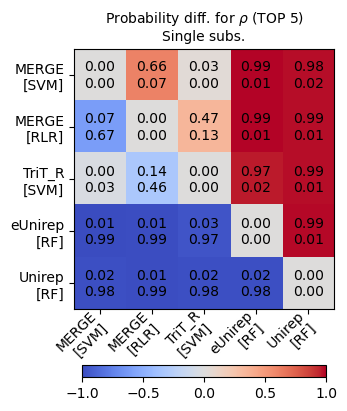

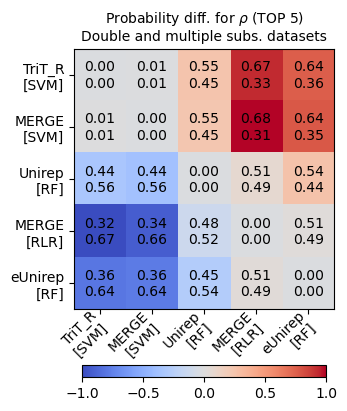

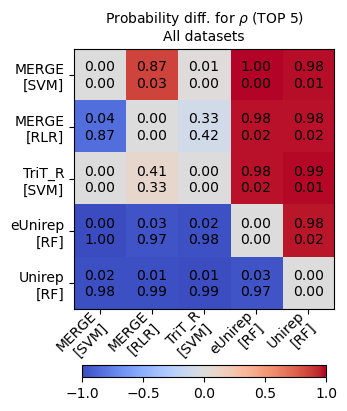

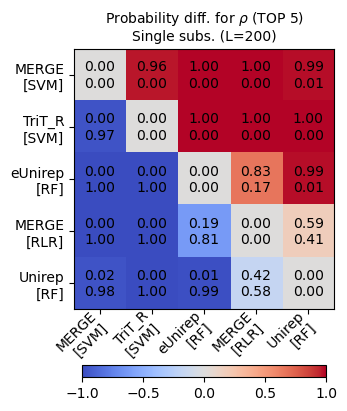

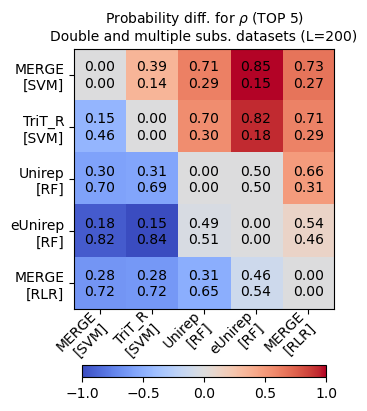

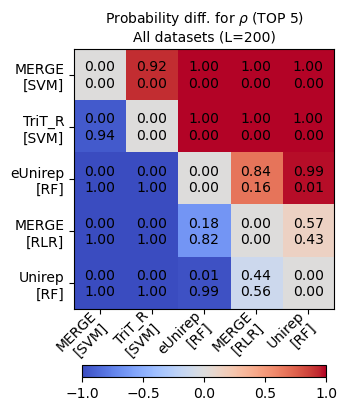

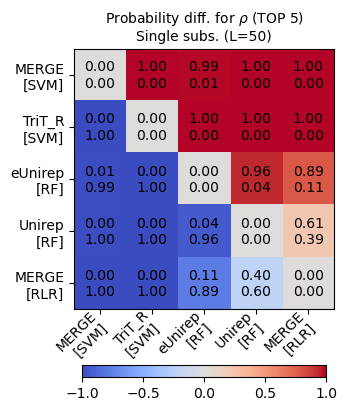

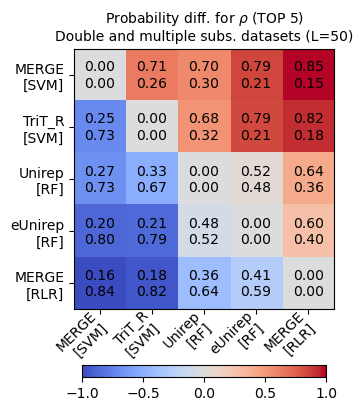

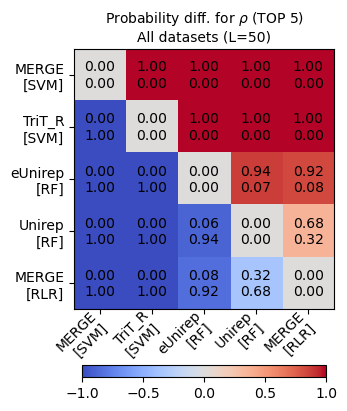

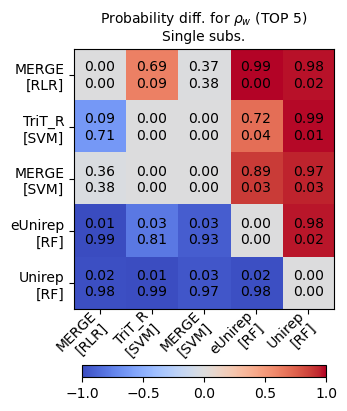

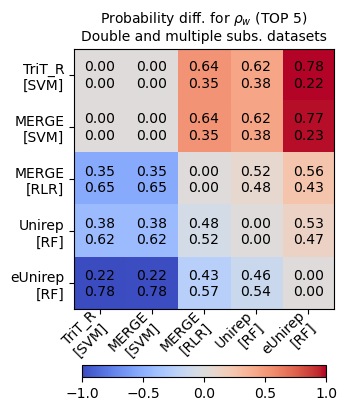

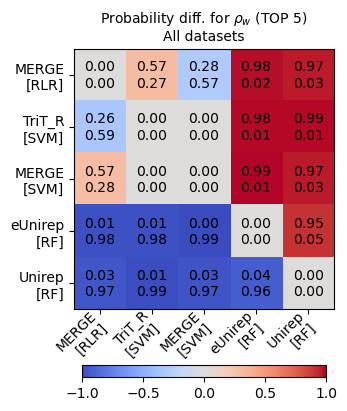

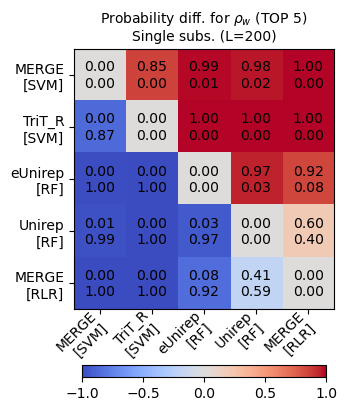

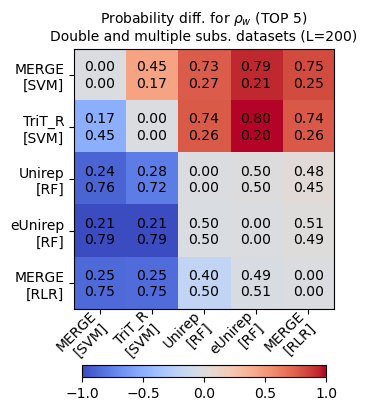

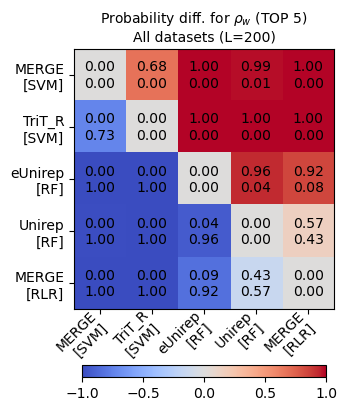

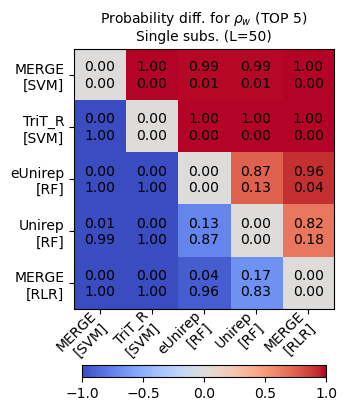

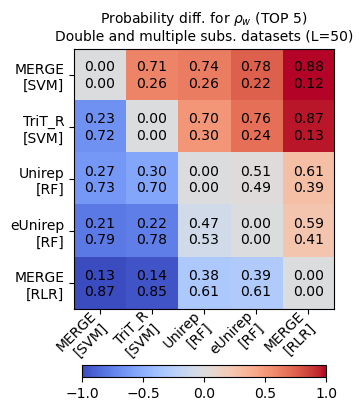

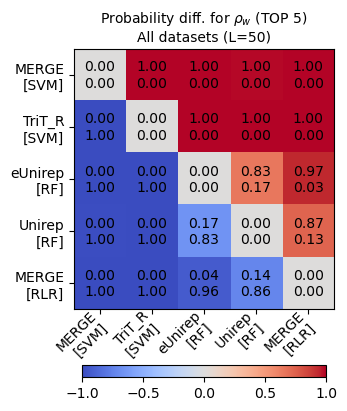

In [526]:
for metric in ['spearman', 'wspearman']: 
    for n in [None, 200, 50]: 
        for datasets in [datasets_1, datasets_2, datasets_1_2]:

            sota_models = ['tritr_svm', 'merge_r', 'merge_svm', 'unirep_rf', 'eunirep_rf']
            
            hits = calculate_hits(sota_models, metric, datasets, rope=0.01, n=n)

            hits_ranking = sorted(hits, key=lambda x: x[1], reverse=True)
            df = pd.DataFrame(hits_ranking, columns=['Model', 'Hits'])

            sota_models = df['Model']
            file_name = f'heatmap_sota_{metric}'
            if n!=None: 
                file_name += f'_{n}'
            if len(datasets) == 2: 
                file_name += '_dm'
            elif len(datasets)==17: 
                file_name += '_s'
            else: 
                file_name += '_all'
            hits = heatmap(sota_models, metric, datasets, rope=0.01, n=n, 
                           superaxis=False, print_probs=True, file_name=file_name)

# Pair triangles 

(600, 800, 3)


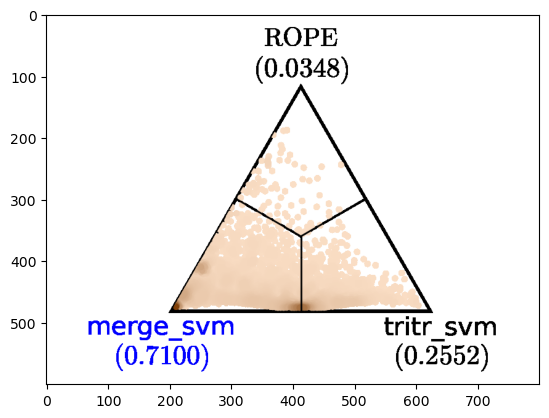

In [527]:
#Change the variables 

method1 = 'merge_svm'
method2 = 'tritr_svm'
metric = 'wspearman' #spearman or wspearman
substitutions = 'dm' #s (single) or dm (double and multiple)
instances = 50 #None or number (250, 200, 150, 100 or 50)


path = ''
if instances==None: 
    path = f'bayesian_figs/bayesian_rope=0.01_{method1}_{method2}_{metric}_{substitutions}.png'
else: 
    path = f'bayesian_figs/bayesian_rope=0.01_{method1}_{method2}_{metric}_{substitutions}_{instances}_instances.png'

im = cv2.imread(path)

h,w = im.shape[:2]
print(im.shape)
plt.imshow(im,cmap='gray')
plt.show()
